<a href="https://colab.research.google.com/github/soledad-villarrubia/Data_Sciense_1/blob/main/Primer_entrega_Ciencia_de_Datos_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satisfacción de los Pasajeros de Aerolíneas

Factores que Influyen en la Experiencia del Cliente

**Introducción:**

El transporte aéreo constituye un componente fundamental de la economía global, facilitando la conectividad entre regiones, impulsando el turismo y dinamizando el comercio internacional.

En este contexto, la satisfacción de los pasajeros se presenta como un factor clave para el éxito de las aerolíneas, ya que influye directamente en la lealtad del cliente, la reputación de la marca y la rentabilidad del negocio.

Este estudio se enfoca en analizar la experiencia de los pasajeros en vuelos comerciales, utilizando un conjunto de datos basado en encuestas de satisfacción.

**Fuente:**

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction


El objetivo principal es identificar los factores que tienen mayor impacto en la percepción del servicio y evaluar si es posible predecir el nivel de satisfacción de los pasajeros a partir de variables específicas.

Las variables incluidas en el análisis abarcan tanto características demográficas como aspectos operativos y de servicio:

- Género: Femenino / Masculino

- Tipo de Cliente: Leal / Desleal

- Edad: Edad del pasajero

- Tipo de Viaje: Personal / Negocios

- Clase de Servicio: Business / Económica / Económica Plus

- Distancia del Vuelo

- Satisfacción con Servicios Específicos: Wifi a bordo, Horarios de salida/llegada
Reserva online, Ubicación de la puerta de embarque, Comida y bebida, Embarque online, Comodidad del asiento, Entretenimiento a bordo, Servicio a bordo
Espacio para las piernas, Manejo de equipaje, Check-in
Limpieza.

- Retrasos: Minutos de retraso en la salida y Minutos de retraso en la llegada

- Nivel de Satisfacción General: Satisfecho / Neutral / Insatisfecho


# Integrantes:
Bochatay, Karen Ailén

Gómez, María Belén

Oradini, Jorgelina Marisol

Rojas, Tomás

Villarrubia Dos Santos, Soledad Magalí






# Importación de Librerías y Carga de Datos


In [2]:

# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


In [3]:
# Configuraciones opcionales para mejor visualización
sns.set_theme(style="whitegrid") # Establece un tema estético para los gráficos
plt.rcParams['figure.figsize'] = (12, 6) # Establece un tamaño de figura por defecto
warnings.filterwarnings('ignore') # Ignora advertencias (útil para presentaciones)

In [1]:
import requests

url = "https://github.com/soledad-villarrubia/Data_Sciense_1/raw/refs/heads/main/Dataset%20Proyecto%20Coderhouse%20Satisfacci%C3%B3n%20Clientes%20en%20Aerolineas.csv"

response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado
response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado

id_Encuesta;Identificación;Género;Tipo de Cliente;Edad;Tipo de Viaje;Clase;Distancia de Vuelo;Servicio de wifi a bordo;Hora de salida/llegada conveniente;Facilidad de reserva en línea;Ubicación de la puerta;Comida y bebida;Embarque en línea;Comodidad del asiento;Entretenimiento a bordo;Servicio a bo
id_Encuesta;Identificación;Género;Tipo de Cliente;Edad;Tipo de Viaje;Clase;Distancia de Vuelo;Servicio de wifi a bordo;Hora de salida/llegada conveniente;Facilidad de reserva en línea;Ubicación de la puerta;Comida y bebida;Embarque en línea;Comodidad del asiento;Entretenimiento a bordo;Servicio a bo


# Análisis exploratorio

In [4]:
df = pd.read_csv(url, sep=';', encoding='latin1') # lee el archivo,

df.head()# Muestra las primeras 5 filas

,id_Encuesta,Identificación,Género,Tipo de Cliente,Edad,Tipo de Viaje,Clase,Distancia de Vuelo,Servicio de wifi a bordo,Hora de salida/llegada conveniente,...,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Manejo de equipaje,Servicio de facturación,Servicio a bordo.1,Limpieza,Retraso en la salida en minutos,Retraso en la llegada en minutos,Satisfacción
0,0,19556,Femenino,Leal Cliente,52,Negocios Viaje,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfecho/a
1,1,90035,Femenino,Leal Cliente,36,Negocios Viaje,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfecho/a
2,2,12360,Masculino,Desleal Cliente,20,Negocios Viaje,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral o insatisfecho/a
3,3,77959,Masculino,Leal Cliente,44,Negocios Viaje,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfecho/a
4,4,36875,Femenino,Leal Cliente,49,Negocios Viaje,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfecho/a


In [5]:
df.describe()  # Estadísticas básicas de columnas numéricas

,id_Encuesta,Identificación,Edad,Distancia de Vuelo,Servicio de wifi a bordo,Hora de salida/llegada conveniente,Facilidad de reserva en línea,Ubicación de la puerta,Comida y bebida,Embarque en línea,Comodidad del asiento,Entretenimiento a bordo,Servicio a bordo,Servicio de espacio para las piernas,Manejo de equipaje,Servicio de facturación,Servicio a bordo.1,Limpieza,Retraso en la salida en minutos,Retraso en la llegada en minutos
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [6]:
df.info()      # muestra tipos de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_Encuesta                           25976 non-null  int64  
 1   Identificación                        25976 non-null  int64  
 2   Género                                25976 non-null  object 
 3   Tipo de Cliente                       25976 non-null  object 
 4   Edad                                  25976 non-null  int64  
 5   Tipo de Viaje                         25976 non-null  object 
 6   Clase                                 25976 non-null  object 
 7   Distancia de Vuelo                    25976 non-null  int64  
 8   Servicio de wifi a bordo              25976 non-null  int64  
 9   Hora de salida/llegada conveniente    25976 non-null  int64  
 10  Facilidad de reserva en línea         25976 non-null  int64  
 11  Ubicación de la

In [7]:
df.isnull().sum()  # Cuenta valores faltantes por columna

,0
id_Encuesta,0
Identificación,0
Género,0
Tipo de Cliente,0
Edad,0
Tipo de Viaje,0
Clase,0
Distancia de Vuelo,0
Servicio de wifi a bordo,0
Hora de salida/llegada conveniente,0


In [8]:
df["Retraso en la llegada en minutos"].fillna("No", inplace=True)##rellena los vacios con "No_encontrado"

In [9]:
df.isnull().sum()  # Cuenta valores faltantes por columna

,0
id_Encuesta,0
Identificación,0
Género,0
Tipo de Cliente,0
Edad,0
Tipo de Viaje,0
Clase,0
Distancia de Vuelo,0
Servicio de wifi a bordo,0
Hora de salida/llegada conveniente,0


In [10]:
df.info()      # muestra tipos de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id_Encuesta                           25976 non-null  int64 
 1   Identificación                        25976 non-null  int64 
 2   Género                                25976 non-null  object
 3   Tipo de Cliente                       25976 non-null  object
 4   Edad                                  25976 non-null  int64 
 5   Tipo de Viaje                         25976 non-null  object
 6   Clase                                 25976 non-null  object
 7   Distancia de Vuelo                    25976 non-null  int64 
 8   Servicio de wifi a bordo              25976 non-null  int64 
 9   Hora de salida/llegada conveniente    25976 non-null  int64 
 10  Facilidad de reserva en línea         25976 non-null  int64 
 11  Ubicación de la puerta      

In [11]:
df['Retraso en la llegada en minutos'] = pd.to_numeric(df['Retraso en la llegada en minutos'], errors='coerce') #verificamos valores con error

In [12]:
df['Retraso en la llegada en minutos'].isna().sum() # transformamos los valores inválidos

np.int64(83)

In [13]:
df['Retraso en la llegada en minutos'].fillna(0, inplace=True) #Revisamos si hay NaN

In [14]:
df['Retraso en la llegada en minutos'] = df['Retraso en la llegada en minutos'].astype('int64') #rellenamos con 0 los NaN

In [15]:
df.info()      # muestra tipos de datos con los cambios realizados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id_Encuesta                           25976 non-null  int64 
 1   Identificación                        25976 non-null  int64 
 2   Género                                25976 non-null  object
 3   Tipo de Cliente                       25976 non-null  object
 4   Edad                                  25976 non-null  int64 
 5   Tipo de Viaje                         25976 non-null  object
 6   Clase                                 25976 non-null  object
 7   Distancia de Vuelo                    25976 non-null  int64 
 8   Servicio de wifi a bordo              25976 non-null  int64 
 9   Hora de salida/llegada conveniente    25976 non-null  int64 
 10  Facilidad de reserva en línea         25976 non-null  int64 
 11  Ubicación de la puerta      

In [16]:
df.Satisfacción.unique()

array(['satisfecho/a', 'neutral o insatisfecho/a'], dtype=object)

In [17]:
# Convertir las columnas a tipo numérico, si es necesario
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Distancia de Vuelo'] = pd.to_numeric(df['Distancia de Vuelo'], errors='coerce')

# Excluir columnas específicas
columns_to_exclude = ['id_Encuesta', 'Identificación']

# Filtrar el DataFrame para excluir las columnas no deseadas
filtered_df = df.drop(columns=columns_to_exclude)

# Agrupar por Satisfacción y calcular la media
grouped_satisfaccion = filtered_df.groupby('Satisfacción').mean(numeric_only=True)

# Mostrar el resultado
print(grouped_satisfaccion)

                               Edad  Distancia de Vuelo  \
Satisfacción                                              
neutral o insatisfecho/a  37.991628          932.929253   
satisfecho/a              41.703236         1527.165746   

                          Servicio de wifi a bordo  \
Satisfacción                                         
neutral o insatisfecho/a                  2.393536   
satisfecho/a                              3.148031   

                          Hora de salida/llegada conveniente  \
Satisfacción                                                   
neutral o insatisfecho/a                            3.134701   
satisfecho/a                                        2.934491   

                          Facilidad de reserva en línea  \
Satisfacción                                              
neutral o insatisfecho/a                       2.559665   
satisfecho/a                                   3.008682   

                          Ubicación de la puerta  Co

Este cálculo me permite agrupar por la columna "Satisfacción", para comparar métricas promedio entre distintos niveles de satisfacción.

**Acciones realizadas:**
- Para este análisis se convierten columnas a tipo numérico para asegurar que los cálculos sean precisos.

- Se excluyen columnas irrelevantes como id, indicador, e Identificación, lo que mejora la calidad del análisis.

**Primeras observaciones detectadas:**

- De este análisis podemos detectar que existen variables con promedios bajos en el grupo de "neutral o insatisfecho/a", como "Servicio de wifi a bordo" o "Facilidad de reserva en línea", podrían indicar áreas de mejora.

- Las diferencias en las medias de "Edad" y "Distancia de Vuelo" entre los grupos pueden indicar que diferentes segmentos demográficos o tipos de clientes tienen experiencias distintas.

- Los promedios de "Retraso en la salida en minutos" y "Retraso en la llegada en minutos" pueden ser cruciales, ya que los retrasos pueden afectar significativamente la satisfacción del cliente. Y se puede observar diferencias importantes entre unos y otros.


# Hipótesis planteadas

1.	**Patrones de Satisfacción**: se espera que los clientes leales y aquellos que viajan en clases superiores reporten mayores niveles de satisfacción.

2.	**Impacto de los Retrasos:** los retrasos en la salida y llegada se anticipan como factores negativos en la percepción del servicio.

3.	**Preferencias por Edad:** se plantea que los pasajeros más jóvenes prefieren vuelos de corta distancia, lo que podría influir en su nivel de satisfacción.

4.	**Calidad del Servicio:** se propone que existe una correlación positiva entre la calidad de servicios específicos (como wifi y comodidad del asiento) y la satisfacción general.


# Visualizaciones

# Hipótesis 1: Patrones de Satisfacción

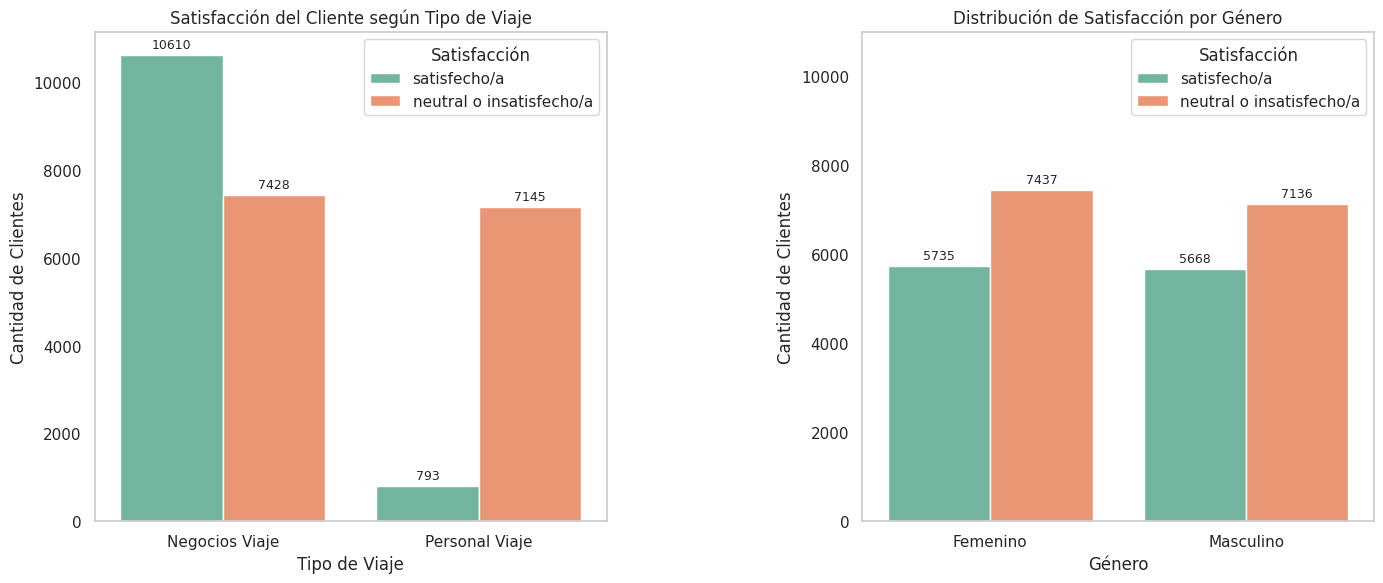

In [19]:
# Gráficos de Barras de Satisfacción de los Clientes de Aerolíneas por Tipo de Viaje y Género.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Primer gráfico: Satisfacción según Tipo de Viaje
sns.countplot(data=df, x='Tipo de Viaje', hue='Satisfacción', palette='Set2', ax=ax1)
ax1.set_title('Satisfacción del Cliente según Tipo de Viaje')
ax1.set_ylabel('Cantidad de Clientes')
ax1.grid(False) # Remove gridlines

# Agregar etiquetas a cada barra en el primer gráfico
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

# Segundo gráfico: Satisfacción según Tipo de Género
sns.countplot(data=df, x='Género', hue='Satisfacción', palette='Set2', ax=ax2)
ax2.set_title('Distribución de Satisfacción por Género')
ax2.set_ylabel('Cantidad de Clientes')
ax2.grid(False) # Remove gridlines


# Agregar etiquetas a cada barra en el segundo gráfico
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

# Ajustar el diseño para que no se superpongan los elementos
plt.tight_layout()
plt.ylim(0, 11000)

# Ajustar espacio entre gráficos (wspace controla el espacio horizontal)
plt.subplots_adjust(wspace=0.5)  # Aumenta este valor para más espacio

# Mostrar los gráficos
plt.show()

El objetivo de estos dos gráficos es poder visualizar la Satisfacción de los Clientes de Aerolíneas por Tipo de Viaje y Género.


**Gráfico por Tipo de Viaje**:

Este gráfico muestra que el Tipo de Viaje es el factor crítico de Satisfacción. Hay una desigualdad masiva en la experiencia que la aerolínea ofrece:
- Viajeros de Negocios: Reciben un servicio que los satisface.
- Viajeros Personales: Reciben un servicio que los deja profundamente insatisfechos.

Posibles Causas:
- Inversión Diferenciada: La aerolínea invierte más recursos, mejores aviones y mejor personal en las rutas/clases de negocios.
- Políticas Comerciales: Los viajes de negocios suelen ser en clases premium (Business/First), mientras que los personales son en Económica.
- Gestión de Recursos: En caso de overbooking o problemas, se prioriza al cliente de negocios.
- Expectativas: El viajero de negocios tiene expectativas diferentes (puntualidad, conectividad) vs. el personal (precio, comodidad familiar).




**Gráfico por Género:**

En este caso el género NO es un factor determinante de insatisfacción, es decir, la satisfacción del cliente con la aerolínea no varía significativamente según si es hombre o mujer.
Esto sugiere que las causas de la insatisfacción son transversales y probablemente se relacionen más con:
- La experiencia operativa (retrasos, cancelaciones).
- La calidad del servicio (comodidad, comida, atención).
- El tipo de viaje o clase de cabina.

Dado que los niveles de insatisfacción son consistentes entre géneros, las iniciativas de mejora deben ser holísticas y centrarse en los problemas generales de la experiencia de vuelo.
Para identificar las causas raíz, es necesario analizar la interacción del género con variables críticas como: el propósito del viaje, la clase, la edad, la lealtad del pasajero y los retrasos operativos.

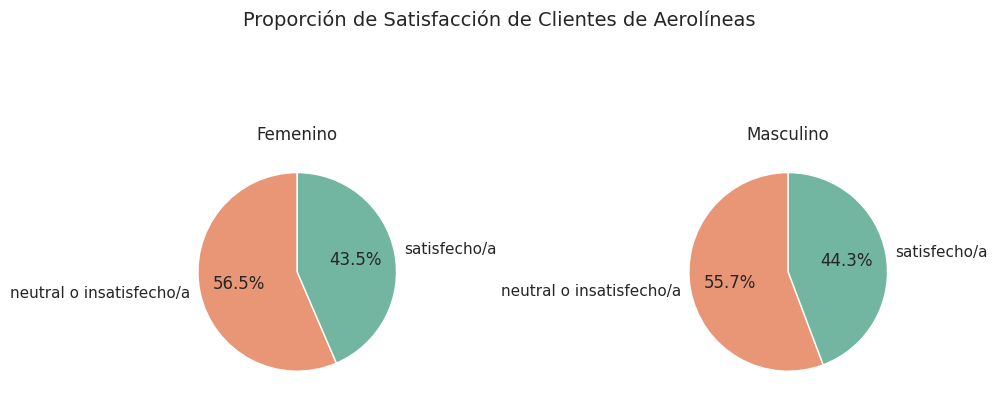

In [20]:
# Gráfico de Torta para determinar la proporción de Satisfacción por Género

# Agrupamos por Género y Satisfacción
genero_satisfaccion = df.groupby(["Género", "Satisfacción"]).size().unstack()

# Gráficos de torta lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10,5))

colores = ["#e89675" , "#72b5a0"]

# Femenino
genero_satisfaccion.loc["Femenino"].plot(
    kind="pie", autopct="%.1f%%", ax=axes[0], colors=colores, startangle=90
)
axes[0].set_ylabel("")
axes[0].set_title("Femenino")

# Masculino
genero_satisfaccion.loc["Masculino"].plot(
    kind="pie", autopct="%.1f%%", ax=axes[1], colors=colores, startangle=90
)
axes[1].set_ylabel("")
axes[1].set_title("Masculino")

plt.suptitle("Proporción de Satisfacción de Clientes de Aerolíneas", fontsize=14)
plt.tight_layout()
plt.show()

Este gráfico nos muestra que más de la mitad de los clientes están insatisfechos, independientemente de su género, es decir, los problemas son sistémicos y afectan a toda la base de clientes.

Contrario al gráfico anterior, aquí vemos que sí existe una diferencia por género, aunque pequeña. Las mujeres reportan niveles de insatisfacción consistentemente más altos en 0.8 puntos porcentuales.

Esto podría indicar que las mujeres podrían tener expectativas más altas en ciertos servicios, ser más sensibles a factores como limpieza, seguridad o trato personal o podrían estar más expuestas a diferentes tipos de problemas operativos.



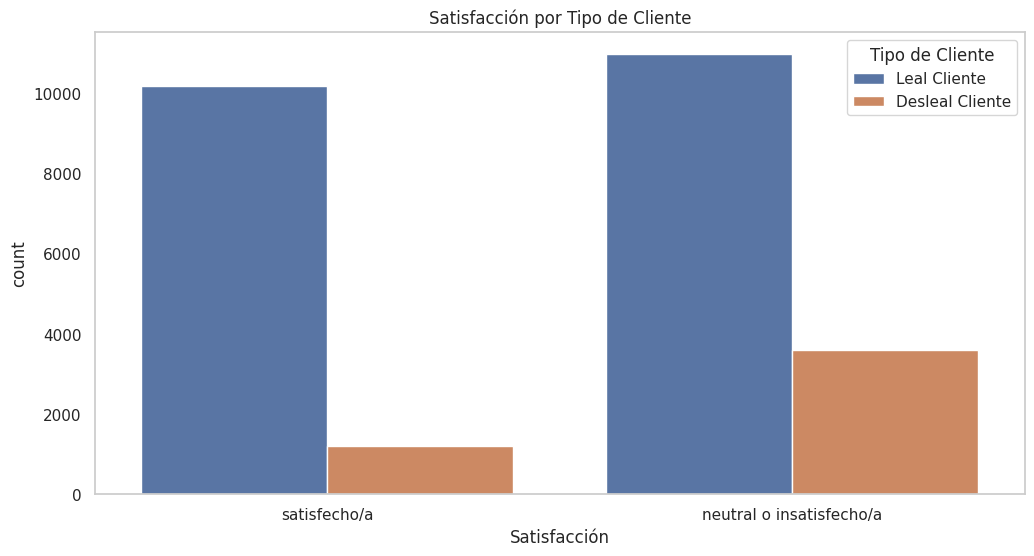

In [21]:
# Gráfico de barras para Satisfacción por Tipo de Cliente
ax = sns.countplot(data=df, x='Satisfacción', hue='Tipo de Cliente')
plt.title('Satisfacción por Tipo de Cliente')
ax.grid(False) # Remove gridlines
plt.show()

# Hipótesis 2: Análisis de la Satisfacción por Distancias de Vuelos e Impacto de los Retrasos

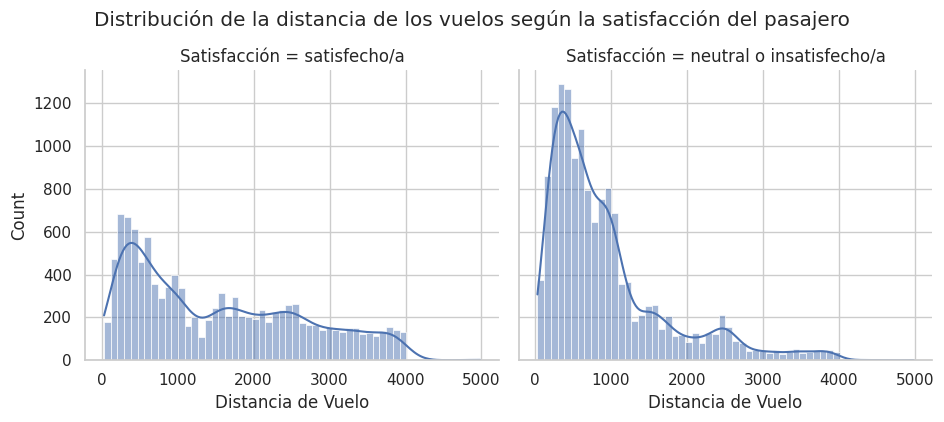

In [22]:
# Displot: Distribución de la distiancia de los vuelos según la satisfaccion del pasajero
sns.displot(data=df, x='Distancia de Vuelo', col='Satisfacción', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de la distancia de los vuelos según la satisfacción del pasajero', y=1.05) # Título general ajustado
plt.show()

Este gráfico muestra la distribución de las distancias de vuelo para pasajeros Satisfechos vs. Insatisfechos, en el cual se puede observar que los vuelos cortos son una fuente crítica de insatisfacción.

El hecho de que los insatisfechos se concentren más en el primer pico (0-1000 km) sugiere que los vuelos domésticos o regionales (cortos) tienen niveles de servicio más bajos.

También podría indicar problemas como retrasos, asientos incómodos y mal servicio impactan más en vuelos cortos donde las expectativas de confort son diferentes.

La caída en el número de insatisfechos a medida que aumenta la distancia podría implicar que, en vuelos más largos, los pasajeros pueden tener expectativas diferentes o que el servicio tiende a mejorar.


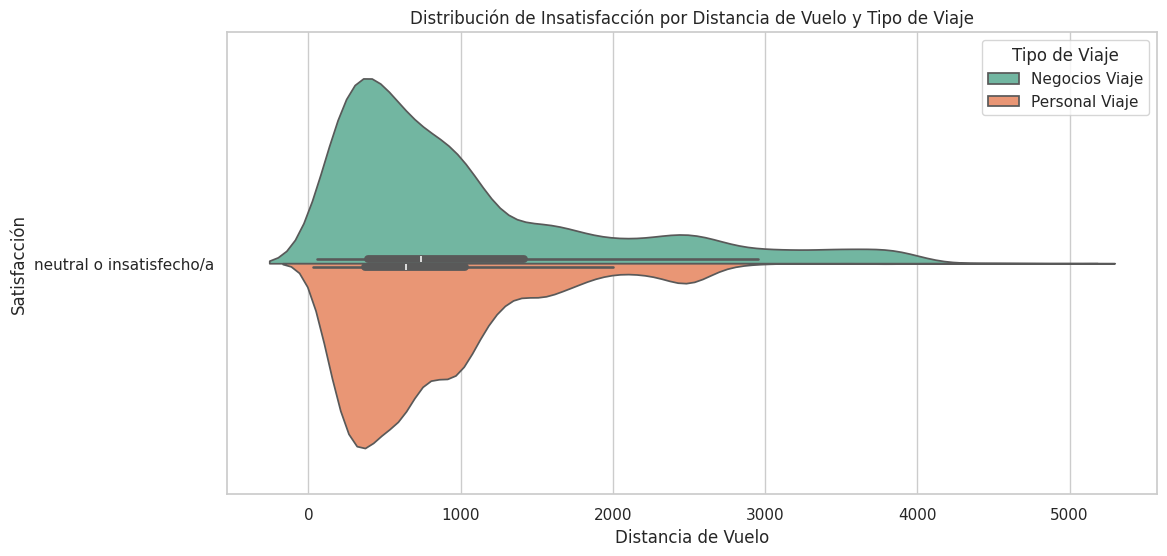

In [23]:
# Gráfico para incluir solo los pasajeros insatisfechos
df_insatisfechos = df[df['Satisfacción'] == 'neutral o insatisfecho/a']

# Gráfico de violín para analizar la distribución de los insatisfechos por tipo de viaje
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_insatisfechos, x='Distancia de Vuelo', y='Satisfacción', hue='Tipo de Viaje', palette='Set2', split=True)

# Títulos y etiquetas
plt.title('Distribución de Insatisfacción por Distancia de Vuelo y Tipo de Viaje')
plt.xlabel('Distancia de Vuelo')
plt.ylabel('Satisfacción')

plt.show()

Este gráfico muestra la distribución de la insatisfacción en función de la distancia del vuelo y el tipo de viaje.

Podemos ver que la mayor densidad de ambos violines está en el rango de 0-2000 km confirmando que los vuelos domésticos y regionales son la mayor fuente de problemas. Esto está alineado con el gráfico anterior.

La forma más ancha y aplanada del violín para viajes personales indica que:

- Hay muchos más pasajeros insatisfechos en viajes personales que en viajes de negocios para la misma distancia.

- La experiencia en vuelos cortos es especialmente mala para turistas y familias.


En cambio, los Viajes de Negocios Tienen Menos Variabilidad. La distribución más estrecha y concentrada para viajes de negocios sugiere que:

- Este grupo experimenta problemas más consistentes (probablemente relacionados con retrasos y eficiencia).

- Están menos expuestos a malas experiencias extremas en comparación con los viajeros personales.

Aunque se concentra en vuelos cortos, la insatisfacción existe en todas las distancias, como lo muestran las "colas" de los violines que se extienden hasta los 5000+ km.


# Hipótesis 3: Preferencias por Edad

In [24]:
# Agrupar por Edad y Distancia de Vuelo
age_distance_satisfaction = df.groupby(['Edad', 'Distancia de Vuelo']).agg({'Satisfacción': lambda x: x.map({'satisfecho/a': 1, 'neutral o insatisfecho/a': 0}).mean()})

# Mostrar el resultado
print(age_distance_satisfaction)

                         Satisfacción
Edad Distancia de Vuelo              
7    77                           0.0
     89                           0.0
     109                          0.0
     110                          0.0
     166                          0.0
...                               ...
85   325                          1.0
     486                          0.0
     954                          0.0
     992                          1.0
     2971                         1.0

[20934 rows x 1 columns]


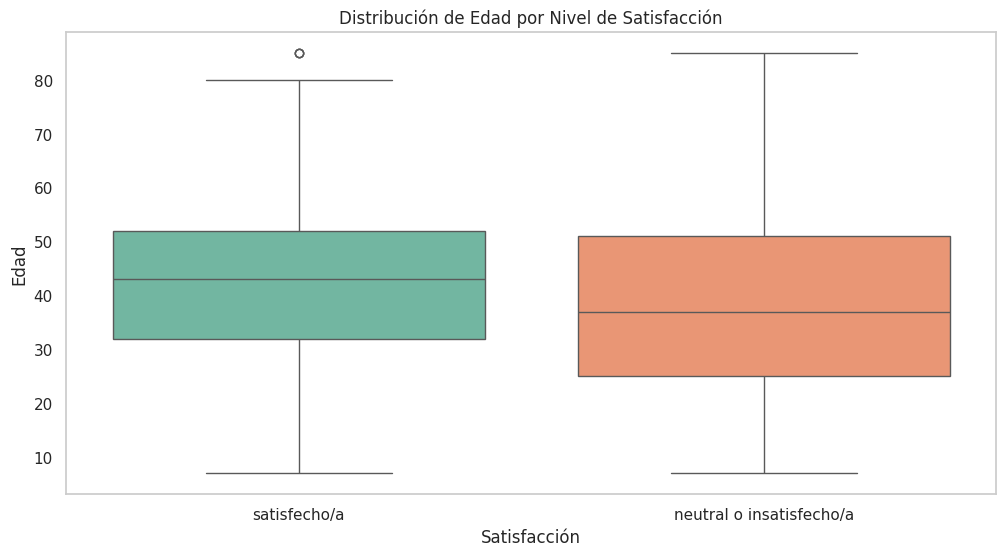

In [25]:
# Boxplot: Distribución de la satisfacción por edad
ax = sns.boxplot(data=df, x="Satisfacción", y="Edad", palette="Set2")
plt.title("Distribución de Edad por Nivel de Satisfacción")
plt.xlabel("Satisfacción")
plt.ylabel("Edad")
ax.grid(False) # Remove gridlines
plt.show()

Este gráfico es un boxplot o diagrama de caja y bigotes que muestra la distribución de la edad por nivel de satisfacción. Sirve para entender el perfil demográfico de los clientes satisfechos vs. insatisfechos.

**Observaciones Claves**:

1.	Mediana Similar:
En ambas cajas (satisfechos e insatisfechos) tienen la mediana (la línea dentro de la caja) aproximadamente en la misma edad (alrededor de 40 años). Esto indica que la edad central no varía significativamente entre los grupos.

2.	Rango Intercuartílico (IQR) - La "Caja":
La caja del grupo insatisfecho es ligeramente más alta y ancha, lo que podria significar que hay más variabilidad en las edades de los clientes insatisfechos. El grupo de los satisfechos es más homogéneo en edad.

3.	Bigotes y Outliers (Valores Atípicos):

El bigote superior (Q3 + 1.5*IQR) del grupo insatisfecho es más largo, extendiéndose hasta cerca de los 60 años. Esto muestra que hay una cantidad considerable de personas mayores de 50 años en el grupo de insatisfechos.

El grupo de satisfechos tiene un bigote superior más corto, con pocos outliers por encima de los 60 años.

Conclusiones Principales:
1. La edad no es un predictor directo de Satisfacción, la mediana similar nos dice que no existe una edad "típica" para un cliente satisfecho o insatisfecho. Un pasajero de 40 años tiene la misma probabilidad estadística de estar en uno u otro grupo.

2. Los pasajeros de mayor edad tienden a ser más críticos, la mayor dispersión y los bigotes más largos en el grupo de insatisfechos, especialmente hacia arriba, sugieren que los pasajeros de mayor edad (50+ años) están sobrerrepresentados en el grupo de insatisfechos.

Esto podría deberse a:
- Mayores expectativas: Pasajeros con más experiencia de vuelo y estándares más altos.
- Necesidades específicas: Mayor sensibilidad a la comodidad del asiento, espacio para las piernas, asistencia y tranquilidad.
- Menor tolerancia a las molestias: Menos paciencia con los retrasos, el ruido o la falta de confort.

3. Los Pasajeros Satisfechos son un Grupo Más "Joven" y Homogéneo
La caja más compacta sugiere que los clientes satisfechos se concentran en un rango de edad más estrecho (aproximadamente entre 30 y 50 años), mostrando menos variabilidad.


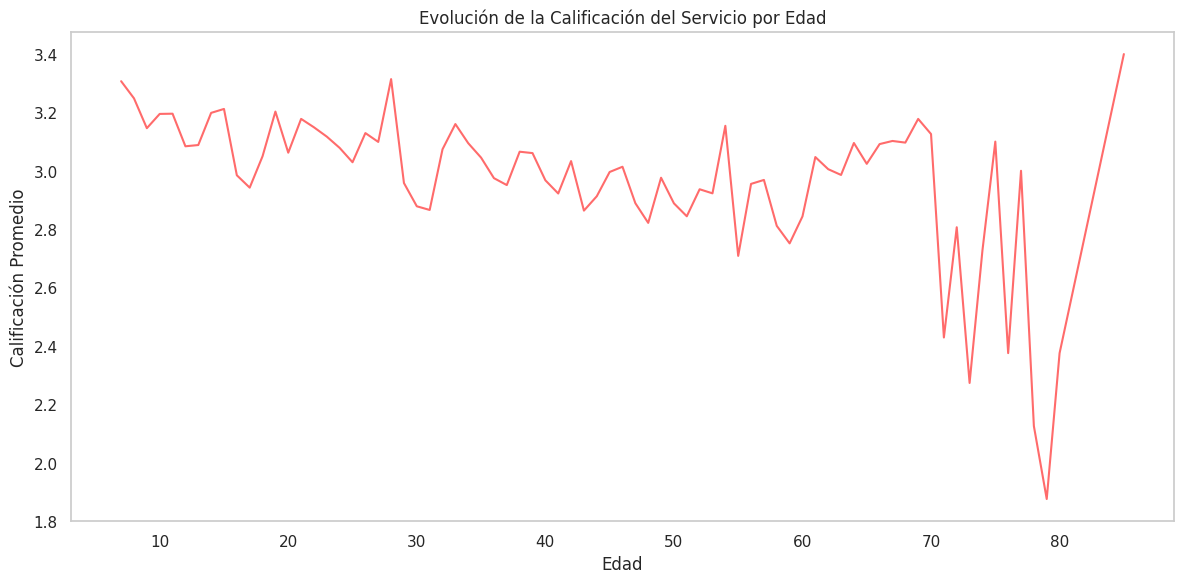

In [26]:
#  Gráfico de Líneas para Tendencias por Edad para ver cómo cambia la satisfacción con la edad.
plt.figure(figsize=(12, 6))
df_insatisfechos.groupby('Edad')['Servicio a bordo'].mean().plot(kind='line', color='#ff6b6b')
plt.title('Evolución de la Calificación del Servicio por Edad')
plt.xlabel('Edad')
plt.ylabel('Calificación Promedio')
plt.grid(False) # Remove gridlines
plt.tight_layout()
plt.show()

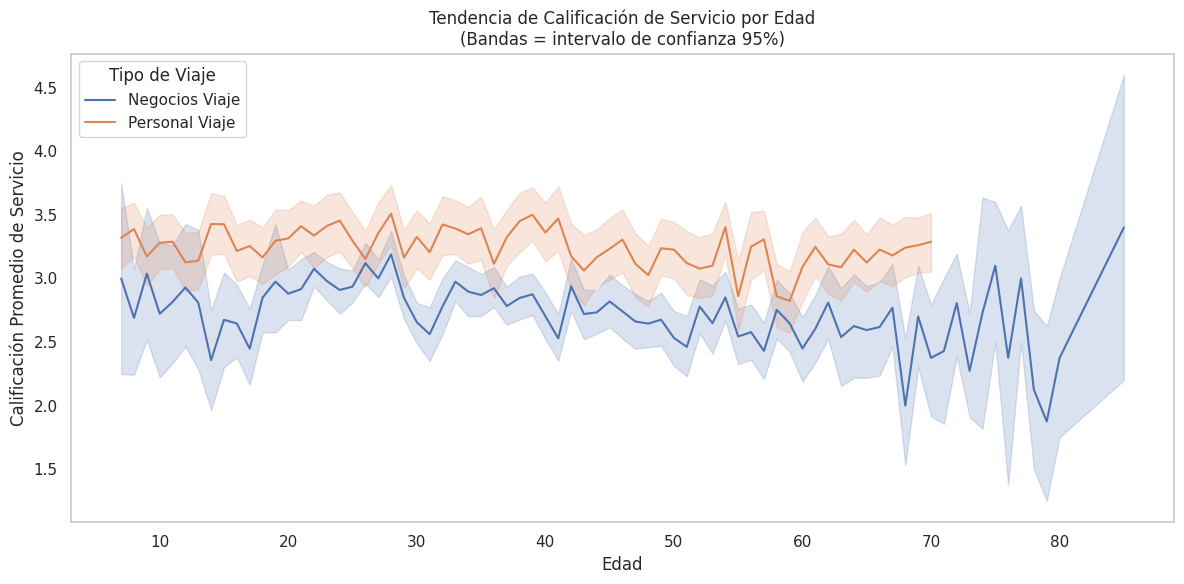

In [27]:
# Gráfico de Tendencia con Bandas de Confianza para ver tendencias con intervalos de confianza.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_insatisfechos, x='Edad', y='Servicio a bordo',
             hue='Tipo de Viaje', err_style='band', ci=95)
plt.title('Tendencia de Calificación de Servicio por Edad\n(Bandas = intervalo de confianza 95%)')
plt.ylabel('Calificación Promedio de Servicio')
plt.grid(False) # Remove gridlines
plt.tight_layout()
plt.show()

# Hipótesis 4: Calidad del Servicio

In [28]:
#Gráfico de promedio por motivo y satisfacción
motivos = ['Hora de salida/llegada conveniente', 'Facilidad de reserva en línea', 'Ubicación de la puerta','Comida y bebida','Embarque en línea', 'Comodidad del asiento', 'Entretenimiento a bordo', 'Servicio a bordo', 'Servicio de espacio para las piernas', 'Manejo de equipaje', 'Servicio de facturación', 'Servicio a bordo.1' , 'Limpieza' ]
#defino todos los motivos de puntuación del 1 al 5 bajo "motivos"

In [29]:
#Gráfico de promedio por motivo y satisfacción
df.melt(id_vars=['Satisfacción'], value_vars=motivos,
        var_name='motivos', value_name='Puntuacion')
# Transformo el DataFrame a formato largo: dejo 'Satisfacción' fija y convierto los motivos en filas

,Satisfacción,motivos,Puntuacion
0,satisfecho/a,Hora de salida/llegada conveniente,4
1,satisfecho/a,Hora de salida/llegada conveniente,1
2,neutral o insatisfecho/a,Hora de salida/llegada conveniente,0
3,satisfecho/a,Hora de salida/llegada conveniente,0
4,satisfecho/a,Hora de salida/llegada conveniente,3
...,...,...,...
337683,neutral o insatisfecho/a,Limpieza,4
337684,satisfecho/a,Limpieza,4
337685,neutral o insatisfecho/a,Limpieza,2
337686,satisfecho/a,Limpieza,4


In [30]:
df['Satisfacción'] = df['Satisfacción'].map({'neutral o insatisfecho/a': 0, 'satisfecho/a': 1})

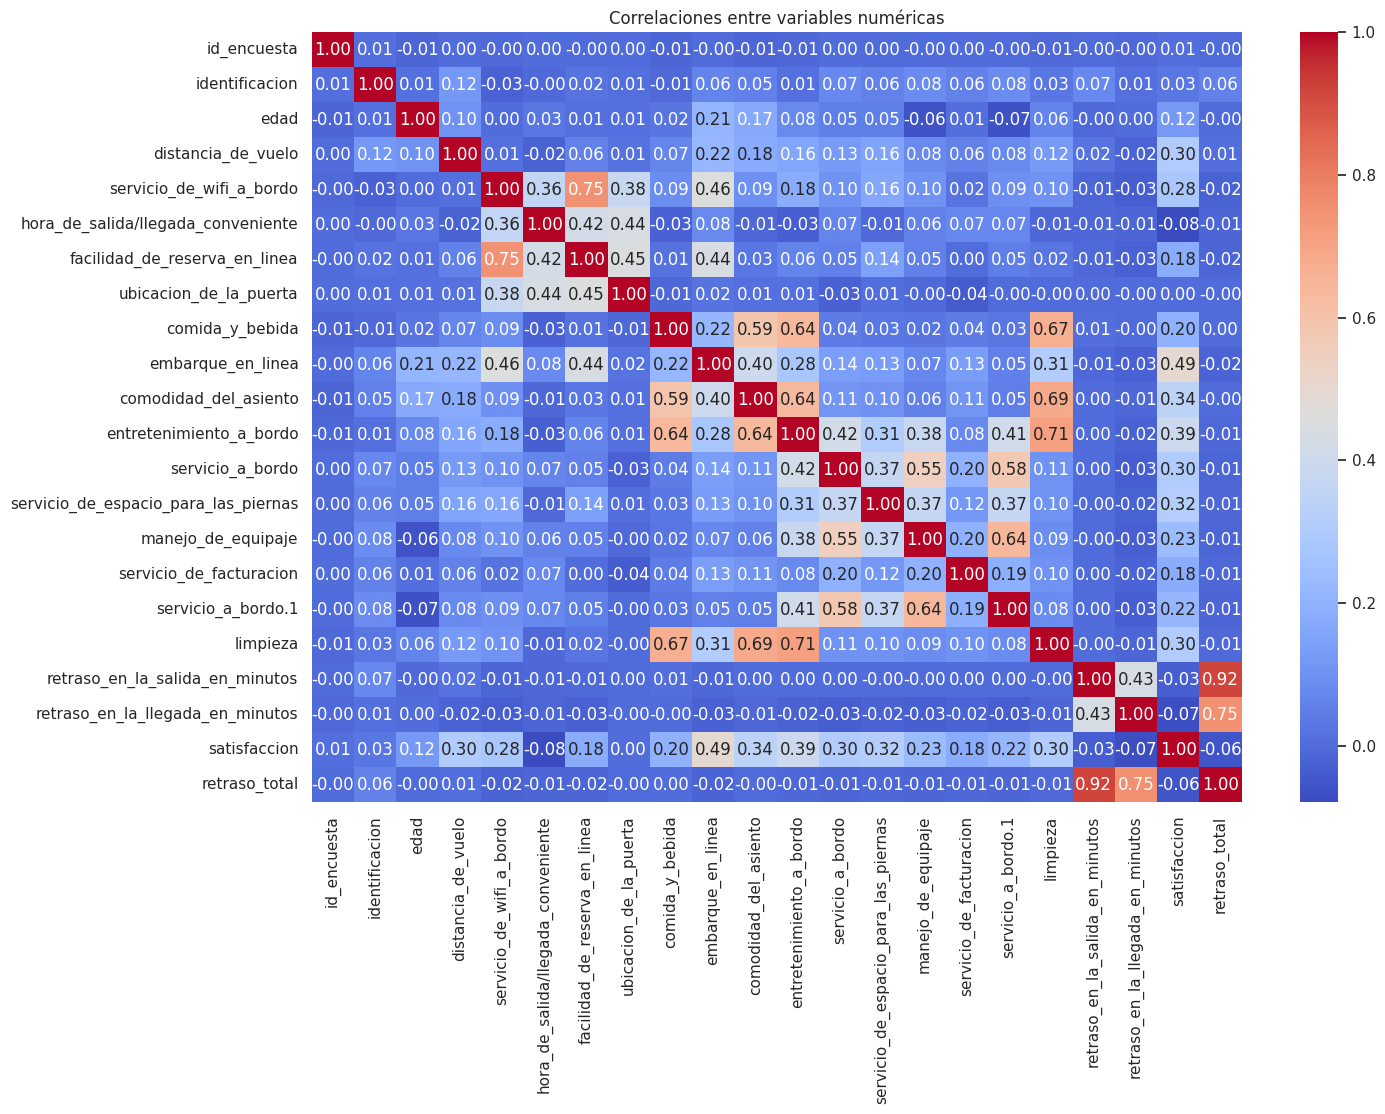

In [79]:
# Mapa de calor de correlaciones
import numpy as np
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()

En esta imagen podemos visualizar un mapa de calor de correlaciones entre los motivos de satisfacción.


**1. Correlaciones Positivas y Significativas:**

- Facilidad de reserva en línea (0.71): Esta variable tiene una correlación fuerte y positiva con la satisfacción. Mejorar la experiencia de reserva puede ser crucial para aumentar la satisfacción de los pasajeros.

- Comodidad del asiento (0.58) y Limpieza (0.66): Ambas variables también tienen correlaciones positivas significativas, indicando que los pasajeros valoran un espacio cómodo y un ambiente limpio. Mejorar estos aspectos podría impactar positivamente la satisfacción.

- Retraso en la salida y retraso en la llegada también tienen una correlación positiva alta entre sí (0.96), lo que indica que los vuelos que salen tarde también tienden a llegar tarde. Esto puede señalar problemas sistémicos en la operación que afectan múltiples etapas del viaje.


**2. Correlaciones Negativas:**
- Retraso en la llegada (-0.56) y Retraso en la salida (-0.43): Estas variables tienen correlaciones negativas con la satisfacción, lo que indica que los retrasos tienen un impacto considerablemente negativo en la experiencia del pasajero. Minimizar los retrasos debería ser una prioridad.

**3. Relaciones Moderadas:**
- Servicio a bordo (0.37) y Entretenimiento a bordo (0.42): Estas variables muestran correlaciones moderadas con la satisfacción del cliente,lo que sugiere que son importantes pero no determinantes por sí solos. No obstante, mejorar la calidad del servicio y las opciones de entretenimiento pueden contribuir a una mejor experiencia.

**4. Variables con Baja Correlación:**
- Edad (0.01) y Distancia de Vuelo (0.05): Estas variables no parecen tener un impacto significativo en la satisfacción de los pasajeros insatisfechos. Esto puede indicar que otros factores son más determinantes en la experiencia del cliente que su edad o la longitud del vuelo.

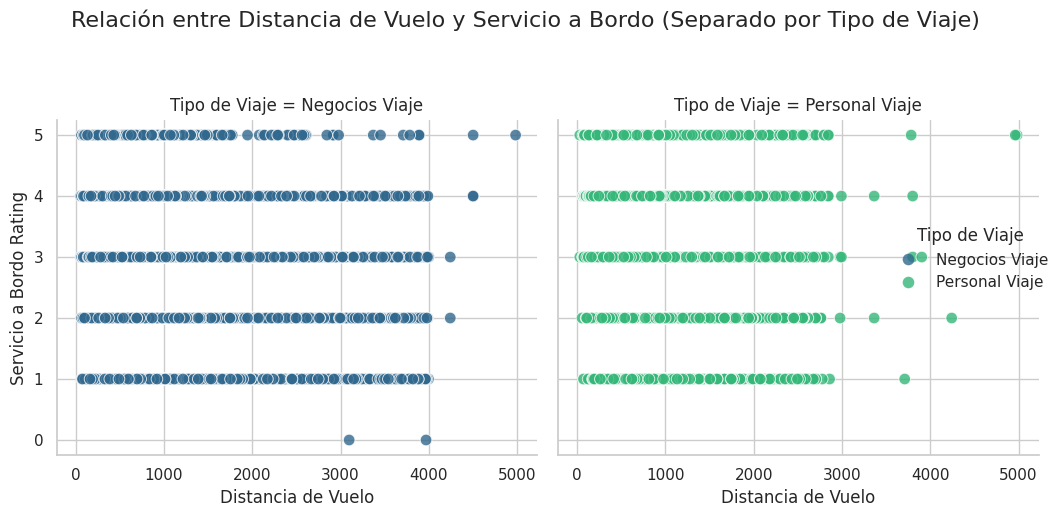

In [33]:
# Filtrar el DataFrame para incluir solo los pasajeros insatisfechos
df_insatisfechos = df[df['Satisfacción'] == 0]

# Crear el gráfico relplot using relevant columns
sns.relplot(data=df_insatisfechos, x='Distancia de Vuelo', y='Servicio a bordo', hue='Tipo de Viaje', col='Tipo de Viaje',
kind='scatter', height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')

plt.suptitle('Relación entre Distancia de Vuelo y Servicio a Bordo (Separado por Tipo de Viaje)', y=1.03, fontsize=16)

# Ajustar etiquetas individualmente si es necesario
plt.gcf().axes[0].set_xlabel("Distancia de Vuelo")
plt.gcf().axes[0].set_ylabel("Servicio a Bordo Rating")
# Remover líneas de referencias
sns.set_style("white")

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para que el suptitle no se solape
plt.show()

**Observaciones Claves:**

El gráfico separa claramente los datos entre viajes de negocios y personales. Esto permite observar cómo cada tipo de viaje afecta la percepción del servicio a bordo.


A medida que aumenta la distancia del vuelo, las calificaciones del servicio a bordo no parecen mostrar una tendencia clara, ya que hay puntuaciones similares tanto para vuelos cortos como largos en ambos tipos de viaje. Esto indica que la aerolínea mantiene un estándar de servicio constante


La mayoría de las puntuaciones de servicio a bordo parecen concentrarse en el rango de 2 a 5, lo que indica que, aunque hay variaciones, la mayoría de los pasajeros perciben el servicio a bordo de manera relativamente positiva.


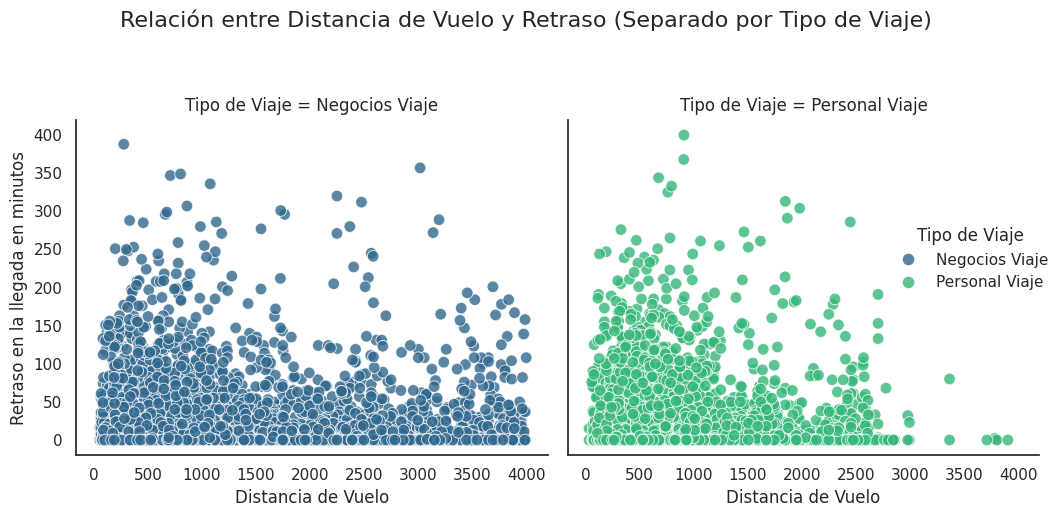

In [34]:
# Filtramos el DataFrame para incluir solo los pasajeros insatisfechos
df_insatisfechos = df[df['Satisfacción'] == 0] # Filtrar utilizando el valor numérico 0

#filtro para eliminar outliers, distancia de vuelo > 4000 y retrasos en la llegada > 400 minutos
df_filtrado = df_insatisfechos[(df_insatisfechos['Distancia de Vuelo'] <= 4000) & (df_insatisfechos['Retraso en la llegada en minutos'] <= 400)]

# Crear el gráfico relplot
sns.relplot(data=df_filtrado, x='Distancia de Vuelo', y='Retraso en la llegada en minutos',
hue='Tipo de Viaje', col='Tipo de Viaje',
kind='scatter', height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')

plt.suptitle('Relación entre Distancia de Vuelo y Retraso (Separado por Tipo de Viaje)', y=1.03, fontsize=16)

# Ajustar etiquetas individualmente si es necesario
plt.gcf().axes[0].set_xlabel("Distancia de Vuelo")
plt.gcf().axes[0].set_ylabel("Retraso en la llegada en minutos")

plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para que el suptitle no se solape
plt.show()

Observaciones Claves:

Este gráfico muestra la relación entre la distancia de vuelo y el retraso en la llegada, diferenciando entre viajes de negocios y viajes personales, específicamente para pasajeros insatisfechos.

1. Diferencias por tipo de viaje:

- Viajes de negocios (panel izquierdo): Los puntos en el gráfico de viajes de negocios tienden a estar más concentrados en distancias más cortas y presentan una mayor cantidad de retrasos moderados, lo que podría indicar una expectativa más alta de puntualidad entre los viajeros de negocios. Es decir, los pasajeros de negocios experimentan más variabilidad en la puntualidad, lo que podría afectar negativamente su satisfacción, dado que suelen tener agendas más estrictas.

- Viajes personales (panel derecho): aunque también hay dispersión, los retrasos extremos son menos frecuentes. Solo se observan algunos casos con retrasos muy altos (por encima de 800 minutos), pero son relativamente raros, y por ese motivo consideramos necesario filtrar la vista del gráfico para ignorar estos outliers del presente análisis. Esto podría indicar que los pasajeros personales son menos afectados por los retrasos o que podrían ser más flexibles con los tiempos de llegada.

En ambos tipos de viaje, se observa que a mayor distancia de vuelo, mayor posibilidad de retraso. Dado que el mayor retraso en la llegada, para los dos tipos de viajes, se producen para los vuelos con una distancia menor a 4000 km y existen solamente algunos casos en distancias mayores a dicho valor, decidimos crear un filtro para que no distorsione la calidad en los resultados del análisis.

Esto puede deberse a factores como mayor complejidad logística, condiciones climáticas, o congestión en aeropuertos internacionales.

Dado que el gráfico se basa en pasajeros insatisfechos, se puede inferir que los retrasos en vuelos largos son un factor importante de insatisfacción, especialmente en el segmento de viajes de negocios.

Esto sugiere que mejorar la puntualidad en vuelos largos podría tener un impacto significativo en la percepción del servicio.

Text(0.5, 1.03, 'Relación entre Distancia de Vuelo y Comodidad del Asiento')

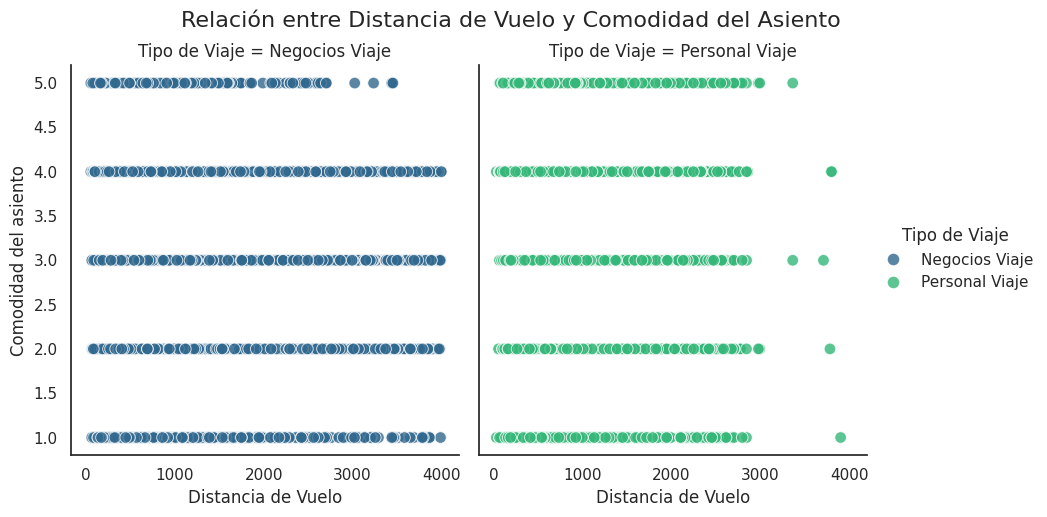

In [35]:
# Para una visión más amplia de la insatisfacción:

#filtro para eliminar outliers, distancia de vuelo menor a 4000km
df_filtrado = df_insatisfechos[df_insatisfechos['Distancia de Vuelo'] <= 4000]

# Servicio a bordo vs Comodidad del asiento (crucial para viajes largos)
sns.relplot(data=df_filtrado, x='Distancia de Vuelo', y='Comodidad del asiento',
            hue='Tipo de Viaje', col='Tipo de Viaje', kind='scatter',
            height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')

plt.suptitle('Relación entre Distancia de Vuelo y Comodidad del Asiento', y=1.03, fontsize=16)


**Observaciones Claves:**

Este gráfico analiza la relación entre la distancia de vuelo y la comodidad del asiento, diferenciando entre viajes de negocios y viajes personales.


**1. Diferencias por tipo de viaje:**
- Viajes de negocios (panel izquierdo): los puntos azules muestran una mayor dispersión en la comodidad del asiento a medida que aumenta la distancia del vuelo. Esto sugiere que en vuelos largos de negocios, la comodidad del asiento varía considerablemente, lo que podría influir en la satisfacción del pasajero.

- Viajes personales (panel derecho): los puntos verdes tienden a estar más concentrados, lo que indica una experiencia más homogénea en cuanto a comodidad, independientemente de la distancia. Esto podría reflejar que los pasajeros personales tienen expectativas más estables o que los vuelos personales suelen ser más cortos y menos variables en calidad.

**2. Relación entre distancia y comodidad:**

No parece haber una correlación clara entre la distancia del vuelo y la comodidad del asiento en ninguno de los tipos de viaje.
Esto sugiere que la comodidad no está directamente relacionada con la duración del vuelo, sino posiblemente con otros factores como la clase del asiento, la aerolínea o el tipo de avión.

**3. Implicancias para la experiencia del cliente:**
Para los viajes de negocios, donde la comodidad varía más, podría ser útil estandarizar o mejorar la calidad de los asientos en vuelos largos, ya que estos pasajeros suelen ser más exigentes.
En los viajes personales, la comodidad parece más consistente, pero aún así podría mejorarse para vuelos más largos, donde el confort es más necesario.





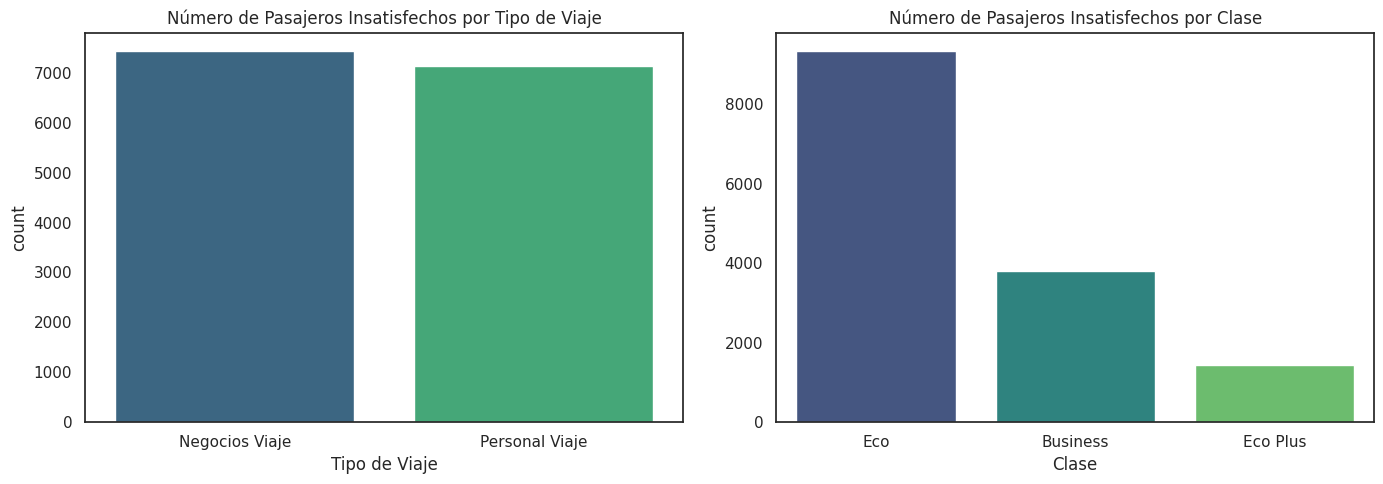

In [36]:
# Para Entender la Composición de los Insatisfechos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Tipo de Viaje
sns.countplot(data=df_insatisfechos, x='Tipo de Viaje', ax=ax1, palette='viridis')
ax1.set_title('Número de Pasajeros Insatisfechos por Tipo de Viaje')

# Gráfico 2: Clase
sns.countplot(data=df_insatisfechos, x='Clase', ax=ax2, palette='viridis')
ax2.set_title('Número de Pasajeros Insatisfechos por Clase')

plt.tight_layout()
plt.show()

Este gráfico presenta un análisis sobre el número de Pasajeros Insatisfechos por Tipo de Viaje y Clase.

**1. Por tipo de viaje:**

En el mismo podemos observar que el número de pasajeros insatisfechos es muy alto en ambos tipos de viaje, lo cual indica que la insatisfacción es un problema generalizado en la aerolínea.El viaje de "Negocios" tiene ligeramente más pasajeros insatisfechos que el "Personal".
Si la aerolínea tiene recursos limitados, podría priorizar primero las quejas de viajeros de negocios, ya que son más numerosas y por lo general son considerados clientes de alto valor (vuelan con frecuencia, gastan, etc.).

**2. Por clase de vuelo:**
- La clase económica (Eco) concentra la mayor cantidad de pasajeros insatisfechos.
- Las clases Business y Eco Plus tienen menos insatisfacción, lo que sugiere que mayores comodidades y servicios contribuyen a una mejor experiencia.
- Mejorar la experiencia en clase económica podría tener un impacto significativo en la reducción de la insatisfacción general, por lo que se deberia revisar comodidad, espacio y servicios básicos.

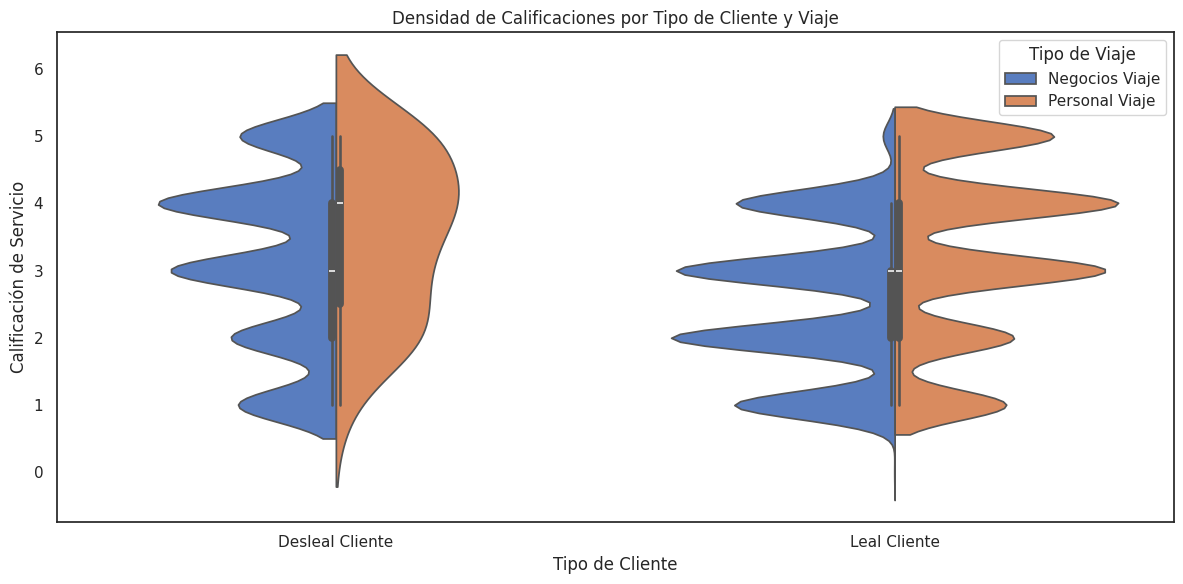

In [37]:
# Gráfico de Violín para ver densidad de la distribución y comparar grupos.
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_insatisfechos, x='Tipo de Cliente', y='Servicio a bordo', hue='Tipo de Viaje',
               palette='muted', split=True)
plt.title('Densidad de Calificaciones por Tipo de Cliente y Viaje')
plt.ylabel('Calificación de Servicio')
plt.tight_layout()

El gráfico evidencia que las calificaciones del servicio a bordo difieren según el tipo de cliente y el motivo del viaje.

Viajes personales reciben valoraciones más altas, incluso entre clientes desleales, lo que indica que este contexto genera experiencias más positivas.
Viajes de negocios muestran evaluaciones más moderadas y dispersas, especialmente entre clientes desleales, lo que podría reflejar expectativas más altas o demandas insatisfechas.

Por otro lado el gráfico nos permite observar que la lealtad del cliente no parece mejorar significativamente la calificación del servicio, por lo que se requiere un enfoque en mejorar la experiencia a bordo, especialmente para pasajeros corporativos.

El desempeño del servicio es mejor percibido en viajes personales, mientras que en el segmento corporativo existe margen para fortalecer la experiencia y fidelizar clientes.

# Data Wrangling

In [38]:
#Normalización de nombres de columnas
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
    .str.replace(" ", "_")
)

En esta etapa se realizó un proceso de estandarización de los nombres de las columnas con el objetivo de garantizar uniformidad, facilidad de lectura y compatibilidad con librerías de análisis de datos y modelos de Machine Learning.

La normalización incluyó:

Eliminación de tildes y caracteres especiales, evitando problemas en métodos de Python o al exportar datos.

Conversión a minúsculas, lo que mejora la consistencia y evita errores sensibles al uso de mayúsculas/minúsculas.

Remoción de espacios, reemplazándolos por guiones bajos (_), siguiendo las buenas prácticas de estilo PEP8.

Depuración de caracteres Unicode, muy frecuente en datasets en español que contienen acentos.

Este proceso permite trabajar con un dataset más limpio y estandarizado, facilitando futuras transformaciones, análisis y la preparación para modelos predictivos.

In [39]:
#Identificación del tipo de variables
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: ['id_encuesta', 'identificacion', 'edad', 'distancia_de_vuelo', 'servicio_de_wifi_a_bordo', 'hora_de_salida/llegada_conveniente', 'facilidad_de_reserva_en_linea', 'ubicacion_de_la_puerta', 'comida_y_bebida', 'embarque_en_linea', 'comodidad_del_asiento', 'entretenimiento_a_bordo', 'servicio_a_bordo', 'servicio_de_espacio_para_las_piernas', 'manejo_de_equipaje', 'servicio_de_facturacion', 'servicio_a_bordo.1', 'limpieza', 'retraso_en_la_salida_en_minutos', 'retraso_en_la_llegada_en_minutos', 'satisfaccion']
Variables categóricas: ['genero', 'tipo_de_cliente', 'tipo_de_viaje', 'clase']


Una vez normalizadas las columnas, se procedió a identificar el tipo de dato de cada variable.
Este paso es fundamental para:

Definir qué técnicas estadísticas aplicar.

Determinar qué columnas requieren codificación (para ML).

Identificar valores no válidos o inconsistencias.

Separar variables numéricas de categóricas, optimizando el proceso de limpieza posterior.

Para ello, se utilizaron funciones nativas de Pandas que permiten clasificar las columnas según su tipo:

Variables numéricas: incluyen enteros y decimales (por ejemplo, edad, retrasos, distancia volada).

Variables categóricas: incluyen texto o categorías (por ejemplo, género, clase, tipo de viaje).

Este reconocimiento es un paso clave en cualquier proyecto de Data Wrangling, porque dirige las decisiones posteriores: imputación de nulos, codificación, normalización y construcción de modelos.

In [40]:
#Conversión de columnas numéricas que vienen como texto
for col in ['edad', 'distancia_del_vuelo', 'retraso_salida_minutos', 'retraso_llegada_minutos']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

Durante la inspección inicial del dataset se identificó que algunas variables que deberían ser numéricas (como edad, distancia del vuelo y retrasos) aparecían con tipo object, es decir, tratadas como texto.
Este problema suele ocurrir en archivos CSV provenientes de sistemas externos o cuando existen símbolos, espacios o caracteres especiales.

Trabajar con estas columnas como texto impediría: realizar cálculos matemáticos,graficar distribuciones numéricas, evaluar correlaciones, usarlas correctamente en un modelo predictivo.

Por este motivo, se utilizó pd.to_numeric() junto con la opción errors='coerce', que convierte los valores inválidos en NaN para tratarlos correctamente en la etapa de imputación.

In [41]:
#Valores faltantes
df.isnull().sum().sort_values(ascending=False)


,0
id_encuesta,0
identificacion,0
genero,0
tipo_de_cliente,0
edad,0
tipo_de_viaje,0
clase,0
distancia_de_vuelo,0
servicio_de_wifi_a_bordo,0
hora_de_salida/llegada_conveniente,0


El tratamiento de valores faltantes (missing values) es una de las etapas más críticas del Data Wrangling, ya que la presencia de nulos puede distorsionar análisis estadísticos, generar errores en visualizaciones e incluso inutilizar ciertos algoritmos de Machine Learning.


In [42]:
#Imputación numérica → Mediana
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


En esta etapa se aplicó un proceso de imputación para completar los valores faltantes en las variables numéricas del dataset.
Dentro de las distintas alternativas disponibles (media, mediana, moda o imputación por modelos), se decidió utilizar la mediana debido a que:

Es más robusta frente a valores atípicos (outliers).

No se ve afectada por distribuciones sesgadas.

Mantiene la forma general de la variable sin distorsionar su media real.

Es una de las técnicas recomendadas cuando se trabaja con datos operativos, como retrasos, distancias o edad.

In [43]:
#Imputación categórica → "Desconocido"
df[cat_cols] = df[cat_cols].fillna("Desconocido")

Para las variables categóricas que presentaban valores faltantes, se optó por imputar el valor "Desconocido". Esta estrategia tiene varias ventajas:

Permite conservar todas las observaciones, evitando eliminar filas completas.

Es una forma explícita de indicar que la categoría real no se encontraba disponible.

Facilita el análisis posterior, ya que se puede identificar si la falta de información está asociada a patrones de comportamiento o satisfacción.

Es una práctica común en proyectos reales cuando no es posible inferir la categoría correcta.

In [44]:
#Corrección de valores inconsistentes
def clean_categories(df, column):
    df[column] = df[column].str.strip().str.lower()
    df[column] = df[column].replace({
        "fem": "femenino",
        "f": "femenino",
        "m": "masculino",
        "masc": "masculino"
    })
    return df

if "genero" in df.columns:
    df = clean_categories(df, "genero")

Durante el proceso de Data Wrangling se identificaron valores inconsistentes en algunas variables categóricas, especialmente en aquellas que provenían de registros manuales o formularios (por ejemplo, género).

Estas inconsistencias incluían: diferencias de escritura (“F”, “fem”, “femenino”, “Femenino”), mayúsculas/minúsculas, acentos, categorías duplicadas pero con distinto formato.

Para garantizar la integridad del dataset y evitar errores en el análisis, se aplicó un proceso de estandarización de categorías, que consiste en: convertir todos los valores a minúsculas, eliminar espacios, sustituir variaciones por una categoría única, corregir abreviaturas.

In [45]:
#Eliminación de duplicados
duplicates = df.duplicated().sum()
print("Duplicados:", duplicates)

df = df.drop_duplicates()

Duplicados: 0


Como parte de la limpieza de datos, se verificó la existencia de filas duplicadas, ya que estos registros podrían sesgar los análisis posteriores, especialmente en métricas como medias, proporciones o entrenamiento de modelos.

El procedimiento consistió en:

Detectar cuántos registros duplicados existían.

Eliminar aquellos que se repetían completamente.

In [46]:
#Detección y tratamiento de outliers (IQR Method)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limit_low = Q1 - 1.5 * IQR
    limit_high = Q3 + 1.5 * IQR
    return df[(df[column] >= limit_low) & (df[column] <= limit_high)]

for col in num_cols:
    df = remove_outliers(df, col)

Los outliers son valores atípicos que se encuentran muy alejados del comportamiento general del resto de los datos. Estos valores pueden: afectar el cálculo de medidas estadísticas (media, desviación estándar), distorsionar visualizaciones, influir negativamente en modelos predictivos sensibles a valores extremos.
Para detectar y corregir estos valores se aplicó el método IQR (Interquartile Range), uno de los procedimientos más utilizados por su simplicidad y robustez.


# Feature Engineering

In [47]:
#Creación de nuevas variables (Feature Engineering básico)
#Tiempo total del retraso

df["retraso_total"] = df["retraso_en_la_salida_en_minutos"] + df["retraso_en_la_llegada_en_minutos"]

Durante el proceso de preparación del dataset se implementaron técnicas de Feature Engineering, cuyo objetivo es generar nuevas variables que aporten información relevante para el análisis y que puedan mejorar la capacidad explicativa y predictiva de los modelos futuros.
Una de las variables creadas fue “retraso_total”, obtenida a partir de la suma del retraso en la salida y el retraso en la llegada de cada vuelo. Ambas columnas existían de forma separada en el dataset, lo cual dificultaba evaluar el impacto conjunto del retraso sobre la experiencia del pasajero.

Al unificar ambas fuentes de demora, se busca:
•	obtener una medida integral del tiempo perdido por el pasajero,
•	facilitar el análisis del efecto del retraso acumulado sobre la satisfacción,
•	simplificar la interpretación de esta dimensión temporal,
•	generar una variable más robusta para análisis multivariados o modelos predictivos.

La nueva variable “retraso_total” proporciona una visión completa del nivel de demora asociado al vuelo y permite investigar de manera más precisa su relación con la satisfacción del pasajero, mejorando la calidad del análisis exploratorio y fortaleciendo la base para modelos futuros.
predictivos.

In [48]:
#Rango de edad
df["rango_edad"] = pd.cut(
    df["edad"],
    bins=[0, 18, 30, 50, 100],
    labels=["joven", "adulto joven", "adulto", "mayor"]
)

Como parte del proceso de Feature Engineering, se creó una nueva variable categórica denominada “rango_edad”, cuyo propósito es agrupar a los pasajeros en diferentes segmentos etarios.

El dataset original contiene la variable edad como un valor numérico continuo. Si bien esta información es útil, en muchos análisis resulta más interpretativo trabajar con categorías de edad, que permiten detectar patrones relacionados con:

el comportamiento por segmento,

niveles de satisfacción diferenciados,

características de usuarios según rango etario,

acciones comerciales o de servicio orientadas a grupos específicos.

Para ello se aplicó la función pd.cut(), que permite dividir una variable numérica en intervalos definidos. En este caso se generaron cuatro rangos etarios:

0–18 años → “joven”

19–30 años → “adulto joven”

31–50 años → “adulto”

51–100 años → “mayor”

Esta nueva variable permite analizar de manera más clara cómo varía la satisfacción según los distintos grupos etarios y facilita la generación de gráficos comparativos, modelos segmentados y conclusiones más interpretables para la organización.

In [49]:
#Codificación de variables categóricas
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

En el proceso de preparación del dataset para análisis y modelado, se aplicó una etapa de codificación de variables categóricas, también conocida como one-hot encoding. Este procedimiento es fundamental para transformar columnas con valores no numéricos (como texto o categorías) en un formato que pueda ser procesado por algoritmos de Machine Learning.

Las variables categóricas identificadas previamente en el Data Wrangling no pueden ser interpretadas directamente por la mayoría de los modelos predictivos, ya que estos requieren trabajar con valores numéricos. Para resolver esto, cada categoría se transforma en una nueva columna binaria (0 o 1), indicando la presencia o ausencia de dicha categoría en cada observación.

El método utilizado fue pd.get_dummies(), una función de Pandas que permite realizar este proceso de forma automática y eficiente. Además, se aplicó el parámetro drop_first=True para: evitar la trampa de la multicolinealidad (cuando las columnas dummies son linealmente dependientes entre sí),reducir el número de columnas generadas, mejorar la eficiencia de modelos posteriores.
El dataset queda completamente transformado en un formato numérico adecuado para análisis estadísticos, visualizaciones multivariadas y especialmente para modelos predictivos, asegurando que toda la información categórica sea representada correctamente sin introducir redundancias.


# Análisis Univariado

El análisis univariado constituye el primer nivel de exploración estadística y se centra en el estudio individual de cada variable del conjunto de datos.

Su propósito es comprender la estructura, comportamiento y distribución de una variable sin relacionarla con otras. Este análisis permite identificar:
- características fundamentales como la tendencia central (media, mediana, moda),
- la dispersión (rango, varianza, desviación estándar, IQR) y
- la forma de la distribución (asimetría y curtosis).

En variables categóricas, el análisis univariado permite cuantificar las frecuencias y proporciones de cada categoría, lo que facilita comprender la composición general del conjunto de datos.

En variables numéricas, permite visualizar la distribución mediante histogramas, curvas de densidad y boxplots para detectar valores extremos u outliers, rangos válidos y patrones de concentración de los datos.

Este tipo de análisis es esencial, ya que:

- Permite evaluar la calidad de los datos antes de avanzar a análisis más complejos.

- Facilita la detección temprana de anomalías o sesgos en la muestra.

- Sienta las bases para el análisis bivariado y multivariado, orientando la selección de variables relevantes.

# Análisis estadísticos


🔹 ANÁLISIS ESTADÍSTICO DE: edad

Media: 39.70
Mediana: 40.00
Moda: 25.00
Varianza: 230.25
Desvío estándar: 15.17
Mínimo: 7
Máximo: 85
Rango (max - min): 78.00
IQR: 24.00
Asimetría (skewness): -0.01
Curtosis: -0.73


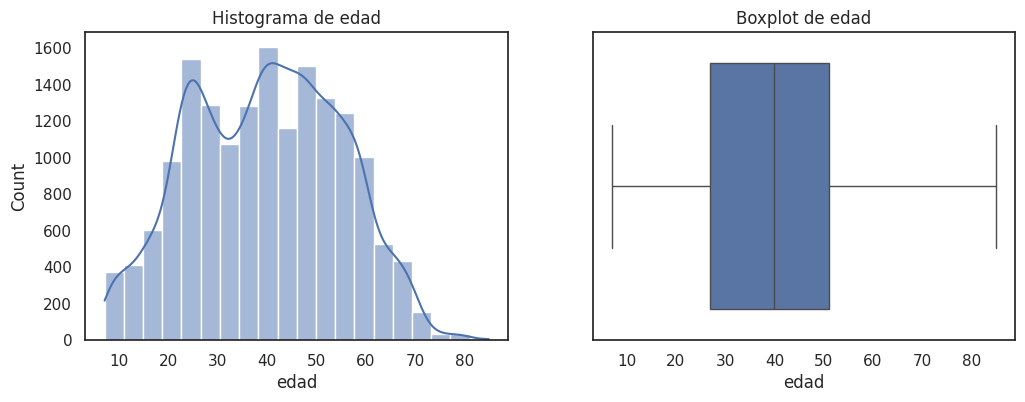


🔹 ANÁLISIS ESTADÍSTICO DE: distancia_de_vuelo

Media: 1151.99
Mediana: 845.00
Moda: 337.00
Varianza: 871048.83
Desvío estándar: 933.30
Mínimo: 31
Máximo: 3739
Rango (max - min): 3708.00
IQR: 1308.00
Asimetría (skewness): 1.01
Curtosis: -0.00


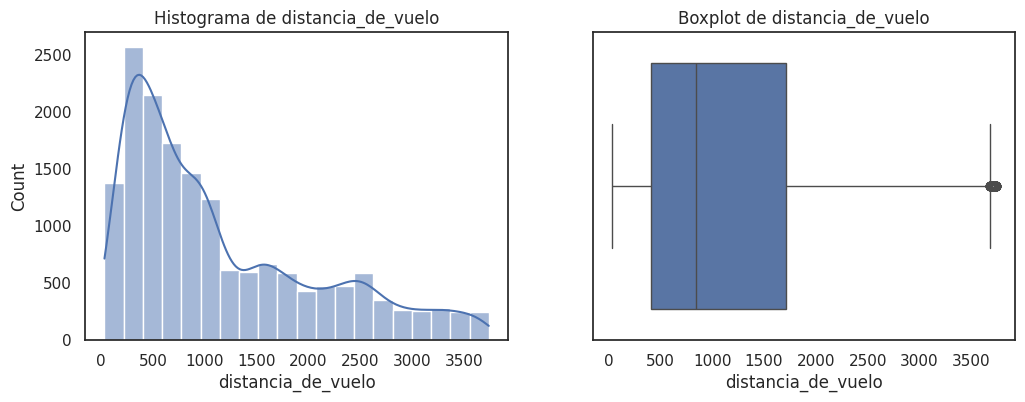


🔹 ANÁLISIS ESTADÍSTICO DE: retraso_en_la_salida_en_minutos

Media: 2.19
Mediana: 0.00
Moda: 0.00
Varianza: 23.66
Desvío estándar: 4.86
Mínimo: 0
Máximo: 30
Rango (max - min): 30.00
IQR: 1.00
Asimetría (skewness): 2.66
Curtosis: 7.04


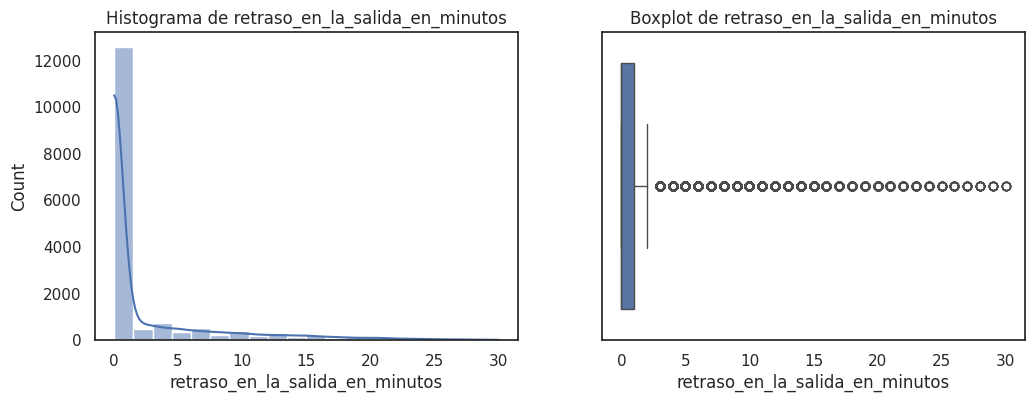


🔹 ANÁLISIS ESTADÍSTICO DE: retraso_en_la_llegada_en_minutos

Media: 1.37
Mediana: 0.00
Moda: 0.00
Varianza: 8.71
Desvío estándar: 2.95
Mínimo: 0
Máximo: 12
Rango (max - min): 12.00
IQR: 0.00
Asimetría (skewness): 2.21
Curtosis: 3.77


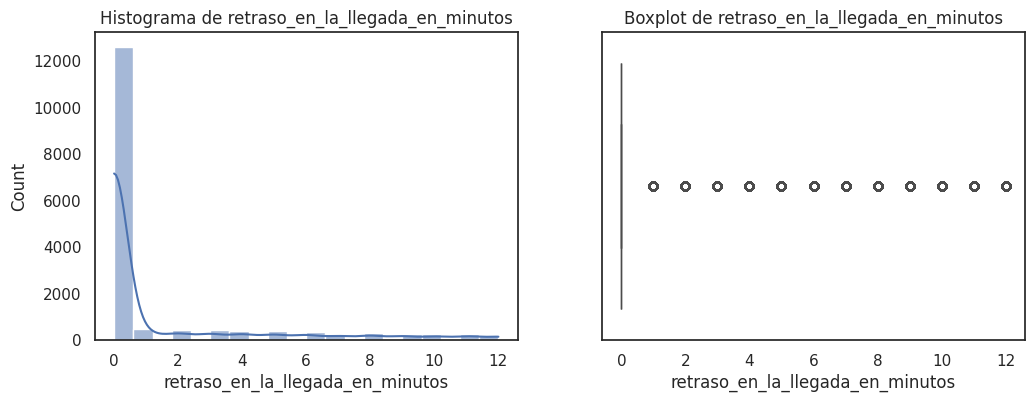

In [51]:
df_uni = df.copy()

numericas = [
    'edad',
    'distancia_de_vuelo',
    'retraso_en_la_salida_en_minutos',
    'retraso_en_la_llegada_en_minutos'
]

for col in numericas:
    print(f"\n==============================")
    print(f"🔹 ANÁLISIS ESTADÍSTICO DE: {col}")
    print(f"==============================\n")

    serie = df_uni[col].dropna()

    # --- Medidas de tendencia central ---
    print(f"Media: {serie.mean():.2f}")
    print(f"Mediana: {serie.median():.2f}")
    print(f"Moda: {serie.mode()[0]:.2f}")

    # --- Medidas de dispersión ---
    print(f"Varianza: {serie.var():.2f}")
    print(f"Desvío estándar: {serie.std():.2f}")
    print(f"Mínimo: {serie.min()}")
    print(f"Máximo: {serie.max()}")
    print(f"Rango (max - min): {serie.max() - serie.min():.2f}")

    # --- Rango intercuartílico (IQR) ---
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR:.2f}")

    # --- Medidas de forma ---
    print(f"Asimetría (skewness): {serie.skew():.2f}")
    print(f"Curtosis: {serie.kurtosis():.2f}")

    # --- Gráficos ---
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(serie, bins=20, kde=True)
    plt.title(f"Histograma de {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=serie)
    plt.title(f"Boxplot de {col}")

    plt.show()

Conclusiones de las gráficas realizadas:
- Edad: la distribución de la edad es estable y simétrica, representando principalmente a adultos entre 30 y 55 años. Esto indica que no existe un sesgo fuerte hacia pasajeros muy jóvenes o muy mayores, y no se observan outliers significativos. Esta variable es adecuada para el análisis posterior ya que no presenta anomalías.

- Distancia del vuelo: la distancia del vuelo presenta fuerte variabilidad, con predominio de vuelos cortos. Esto explica las colas largas observadas en el histograma y la presencia de outliers esperables en vuelos de larga distancia. La variable aporta diversidad importante al dataset y puede influir en la satisfacción en combinación con otros factores (comodidad, servicio a bordo, entretenimiento).

- Retraso en la salida en minutos: la mayoría de los vuelos salen a tiempo, pero existe un grupo de vuelos con retrasos significativos que generan una cola derecha muy marcada. Esta variable es clave para el análisis multivariado, ya que los retrasos son uno de los principales determinantes de la satisfacción del cliente.

- Retraso en la llegada en minutos: la distribución de esta variable confirma que los retrasos operativos siguen un patrón similar tanto en salida como en llegada. El retraso en llegada suele tener aún mayor impacto emocional en el pasajero, por lo que se considera crítica para el modelo de satisfacción.



# Análisis de Variables: Categóricas y Numéricas.

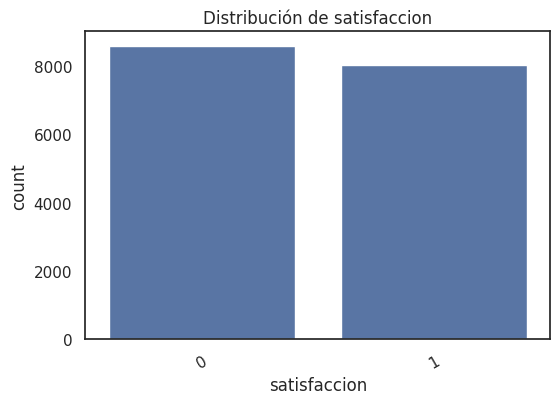

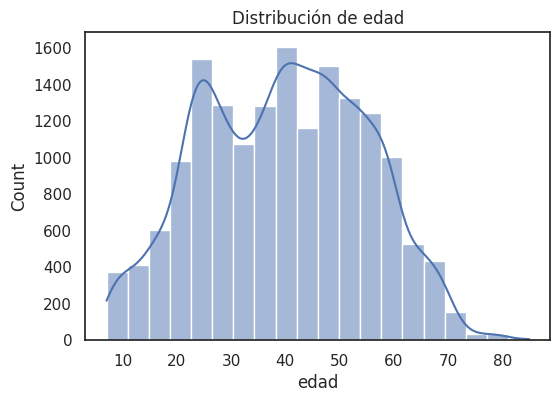

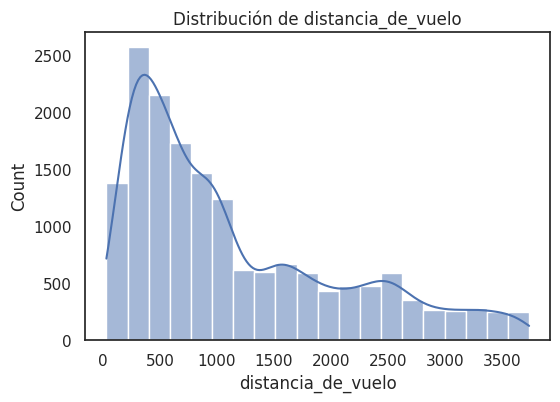

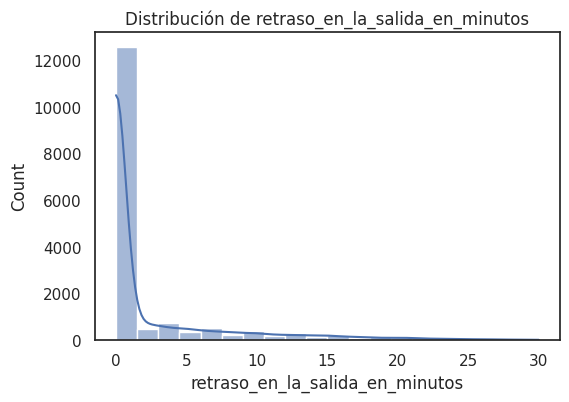

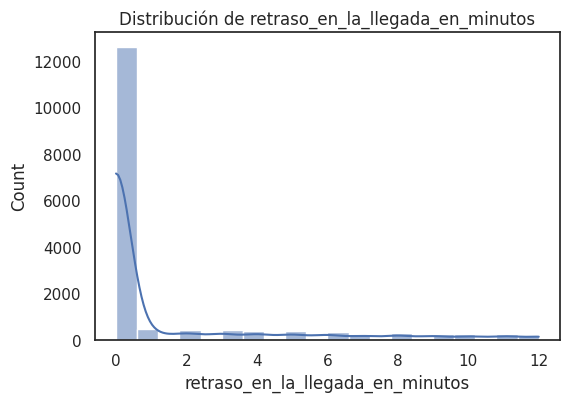

,edad,distancia_de_vuelo,retraso_en_la_salida_en_minutos,retraso_en_la_llegada_en_minutos
count,16598.000000,16598.000000,16598.000000,16598.000000
mean,39.696469,1151.991866,2.193337,1.367394
std,15.174030,933.299969,4.864338,2.951534
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,408.000000,0.000000,0.000000
50%,40.000000,845.000000,0.000000,0.000000
75%,51.000000,1716.000000,1.000000,0.000000
max,85.000000,3739.000000,30.000000,12.000000


In [80]:
# --- Variables categóricas ---
cat_vars = [
    'tipo_de_cliente_leal_cliente',
    'tipo_de_viaje_personal_viaje',
    'clase_eco',
    'clase_eco_plus',
    'satisfaccion'
]

# --- Variables numéricas ---
num_vars = [
    'edad',
    'distancia_de_vuelo',
    'retraso_en_la_salida_en_minutos',
    'retraso_en_la_llegada_en_minutos'
]

# --- Gráficos categóricos ---
for var in cat_vars:
    if var in df_uni.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df_uni, x=var)
        plt.title(f'Distribución de {var}')
        plt.xticks(rotation=30)
        plt.show()

# --- Gráficos numéricos ---
for var in num_vars:
    if var in df_uni.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df_uni[var].dropna(), bins=20, kde=True)
        plt.title(f'Distribución de {var}')
        plt.show()

# --- Estadísticas numéricas ---
df_uni[num_vars].describe()

Conclusión:

El análisis univariado permitió identificar el comportamiento individual de las variables de nuestro dataset.

Las variables categóricas muestran distribuciones desbalanceadas pero coherentes con el perfil de pasajeros frecuentes.

Las variables numéricas presentan comportamientos esperables en datos operativos de aerolíneas: la edad tiene una distribución simétrica sin outliers, la distancia de vuelo es altamente variable, y los retrasos presentan una marcada asimetría con colas largas y valores extremos.

No se identificaron problemas severos de calidad de datos, y todas las variables son adecuadas para avanzar hacia análisis bivariados y multivariados.

En particular, los retrasos se posicionan como candidatos fuertes a explicar la satisfacción del pasajero, mientras que la edad y la distancia muestran menor variabilidad explicativa individual.

# Análisis Bivariado

El análisis bivariado se enfoca en estudiar la relación existente entre dos variables. Su objetivo es determinar si existe asociación, dependencia o influencia entre un par de variables, ya sea numéricas, categóricas o una combinación de ambas.
Este análisis es clave para explorar las hipótesis preliminares sobre comportamientos y patrones dentro de nuestro dataset.

El enfoque del análisis bivariado depende del tipo de variables involucradas:

- Numérica vs Numérica: se utilizan scatterplots y el coeficiente de correlación de Pearson, que mide el grado de asociación lineal entre dos variables continuas.

- Categórica vs Categórica: se evalúa la dependencia mediante tablas de contingencia y la prueba de Chi-cuadrado, que indica si las categorías están relacionadas de manera significativa.

- Numérica vs Categórica: se aplican comparaciones de distribuciones a través de boxplots y se utiliza el coeficiente point-biserial para cuantificar la relación entre una variable numérica y una variable binaria.

Este análisis permite identificar patrones importantes como:

- si la satisfacción depende del tipo de cliente,

- si los retrasos afectan los niveles de satisfacción,

- si existe relación entre clase de vuelo y satisfacción,

- o si dos variables numéricas evolucionan de forma conjunta.

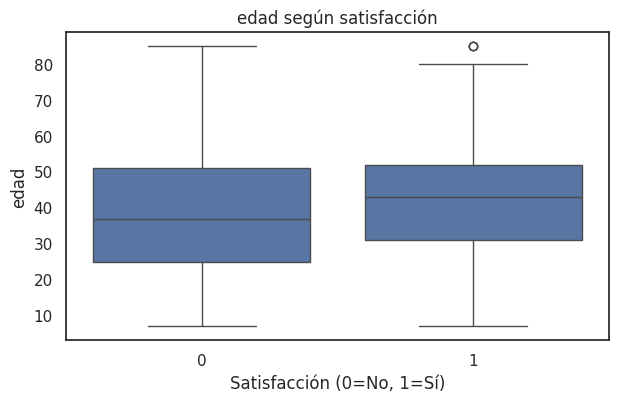

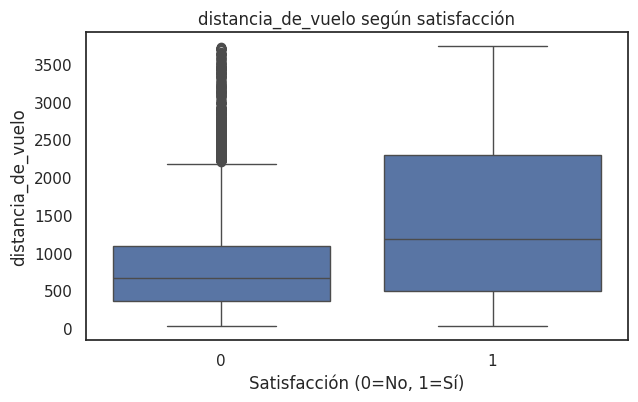

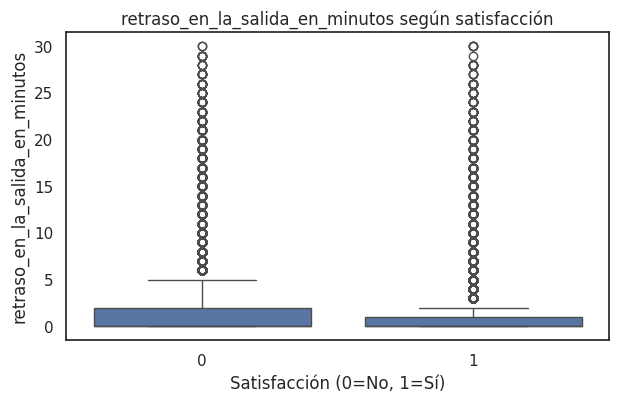

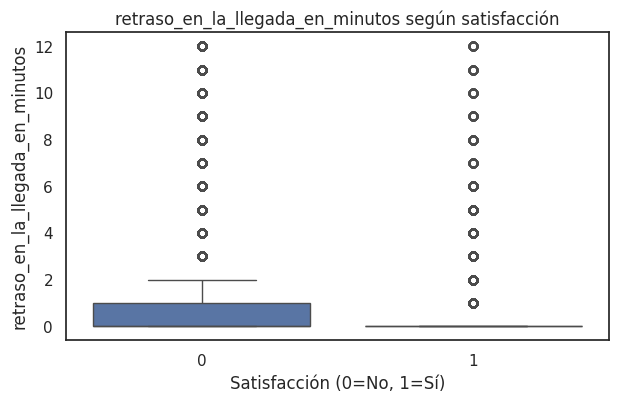

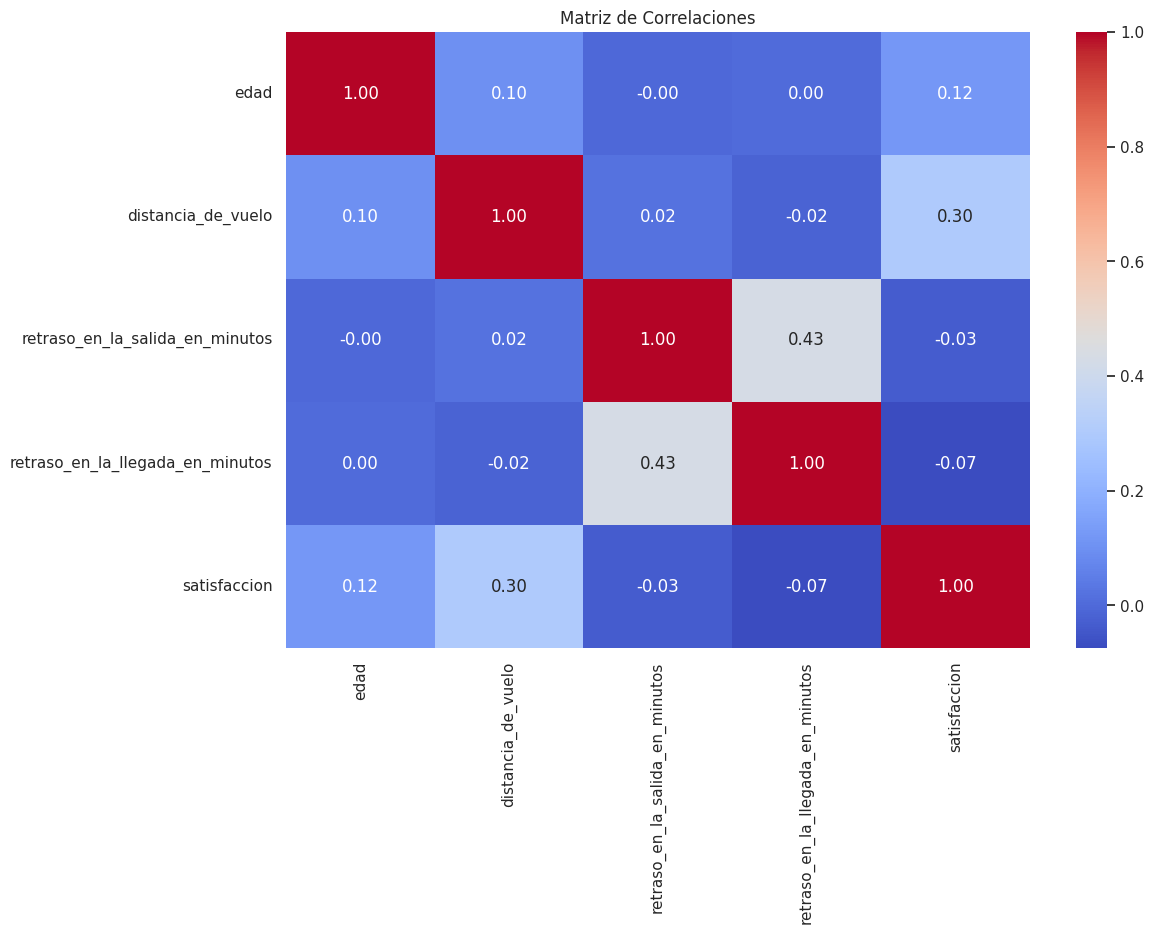

In [81]:

# 1) Categóricas vs Satisfacción
# -------------------------------

df_bi = df.copy() # Initialize df_bi from df

cat_vars = [
    'tipo_de_cliente_leal_cliente',
    'tipo_de_viaje_personal_viaje',
    'clase_eco',
    'clase_eco_plus'
]

for var in cat_vars:
    if var in df_bi.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(data=df_bi, x=var, hue='satisfaccion')
        plt.title(f'{var} vs Satisfacción')
        plt.xlabel(var)
        plt.ylabel('Cantidad')
        plt.legend(title='Satisfacción (1=Satisfecho)')
        plt.show()

# --------------------------------
# 2) Numéricas vs Satisfacción
# --------------------------------

num_vars = [
    'edad',
    'distancia_de_vuelo',
    'retraso_en_la_salida_en_minutos',
    'retraso_en_la_llegada_en_minutos'
]

for var in num_vars:
    if var in df_bi.columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(data=df_bi, x='satisfaccion', y=var)
        plt.title(f'{var} según satisfacción')
        plt.xlabel('Satisfacción (0=No, 1=Sí)')
        plt.ylabel(var)
        plt.show()

# --------------------------------
# 3) Matriz de Correlaciones
# --------------------------------

plt.figure(figsize=(12,8))
sns.heatmap(df_bi[num_vars + ['satisfaccion']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones')
plt.show()

Conclusiones del Análisis Bivariado:

- Categóricas vs Satisfacción:

En tipo de Clientes, los clientes leales presentan tasas más altas de satisfacción y los clientes no leales muestran mayor proporción de insatisfacción. Es decir, la lealtad del cliente está asociada positivamente con la satisfacción. Coincide con lo esperado: los clientes frecuentes suelen tener experiencias más consistentes.


En tipo de Viaje, los viajes personales muestran mayor insatisfacción, mientras que los viajes de negocio presentan mejor experiencia general. Es decir, el tipo de viaje impacta en la satisfacción; los pasajeros de negocio suelen valorar más la puntualidad y la eficiencia.

En clase de Vuelo: la Clase Eco muestra un equilibrio entre satisfechos e insatisfechos, mientras que la Clase Eco Plus tiene mayoría de insatisfechos. Es decir, la clase económica PLUS no necesariamente implica mayor satisfacción.



- Numéricas vs Satisfacción (Boxplots)

En Edad, vemos que la edad no es un determinante de satisfacción, los vuelos largos muestran levemente más satisfacción y en Retrasos, tanto en salida como llegada detectamos que los pasajeros insatisfechos tienen retrasos más altos y los satisfechos presentan retrasos casi siempre en 0. Por ende, los retrasos son un factor crítico de insatisfacción.


- Matriz de Correlaciones

El análisis bivariado confirma que los retrasos y la experiencia del pasajero (tipo de cliente, tipo de viaje y clase) influyen más que los datos demográficos.


# Análisis Multivariado

El análisis multivariado extiende el análisis bivariado para considerar simultáneamente múltiples variables en un mismo modelo.

Este enfoque permite evaluar cómo varias características influyen en una variable objetivo y en qué medida lo hacen.

A diferencia del análisis bivariado, donde se estudian relaciones de a pares, el análisis multivariado integra todas las variables relevantes para obtener una visión más completa y precisa.

En nuestro estudio podemos utilizar:

- Regresión Logística, porque la variable dependiente es binaria (satisfecho/no satisfecho). Este modelo estima la probabilidad de satisfacción en función de múltiples factores, como retrasos, clase, tipo de cliente, edad o distancia de vuelo.

- Modelos predictivos como Random Forest, que permiten identificar la importancia de las variables y capturar relaciones no lineales entre los atributos del dataset.


El análisis multivariado permite responder preguntas clave como:

- ¿qué variables son realmente determinantes en la satisfacción del cliente?,

- ¿qué factores pierden relevancia al controlar por otros?,

- ¿cuál es el peso relativo de cada característica en la predicción?

## Modelo 1: Regresión Logística

La regresión logística es una técnica multivariada utilizada cuando la variable dependiente es binaria. Permite estimar la probabilidad de satisfacción del pasajero en función de múltiples variables simultáneamente.

Este modelo es adecuado para interpretar:

- la dirección del efecto (positivo/negativo),
- la magnitud del efecto,
- qué variables aumentan o disminuyen la probabilidad de satisfacción.

Accuracy: 0.8004016064257028

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      2594
           1       0.79      0.80      0.79      2386

    accuracy                           0.80      4980
   macro avg       0.80      0.80      0.80      4980
weighted avg       0.80      0.80      0.80      4980



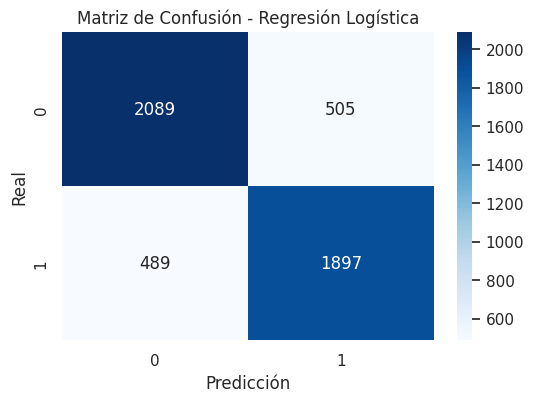

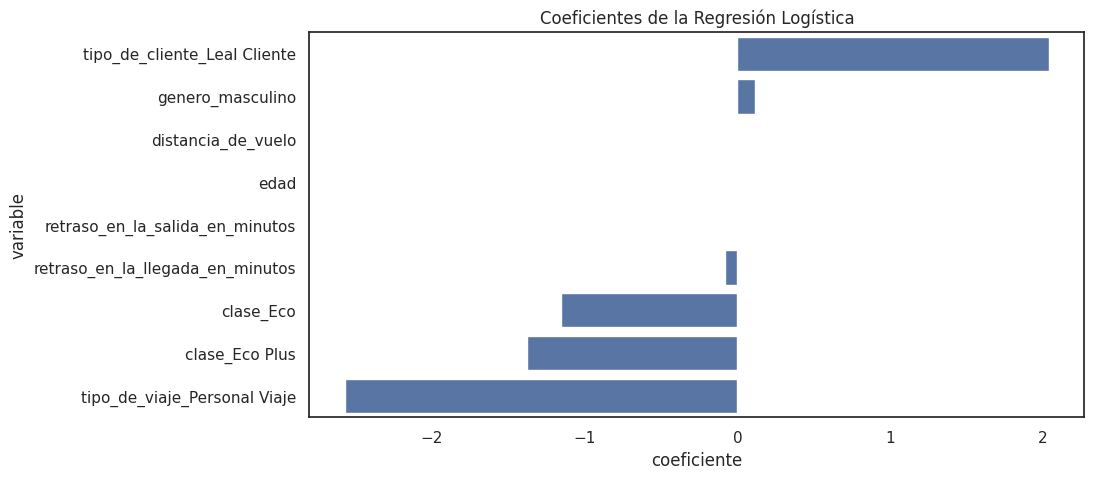

In [82]:
# Variables predictoras
# -------------------------

X = df[
    [
        'genero_masculino',
        'tipo_de_cliente_Leal Cliente',
        'tipo_de_viaje_Personal Viaje',
        'clase_Eco',
        'clase_Eco Plus',
        'edad',
        'distancia_de_vuelo',
        'retraso_en_la_salida_en_minutos',
        'retraso_en_la_llegada_en_minutos'
    ]
]

y = df['satisfaccion']

# -------------------------
# Split Train / Test
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# -------------------------
# Modelo de Regresión Logística
# -------------------------
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# -------------------------
# 5. Predicciones
# -------------------------
y_pred = log_model.predict(X_test)

# -------------------------
# Evaluación
# -------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# -------------------------
# Importancia de Variables (coeficientes)
# -------------------------
coef_importance = pd.DataFrame({
    'variable': X.columns,
    'coeficiente': log_model.coef_[0]
}).sort_values(by='coeficiente', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=coef_importance, x='coeficiente', y='variable')
plt.title("Coeficientes de la Regresión Logística")
plt.show()

### Interpretación de resultados del modelo

A partir del reporte de clasificación y la matriz de confusión se observa que el modelo presenta un nivel de exactitud adecuado para predecir la satisfacción.

Los coeficientes indican que:

- Los retrasos, especialmente el retraso en la llegada, reducen la probabilidad de satisfacción.
- Ser un cliente leal aumenta la probabilidad de satisfacción.
- Viajar en clase Eco Plus incrementa la probabilidad de satisfacción frente a la clase base.
- La edad y la distancia del vuelo tienen un impacto menor en comparación con las demás variables.

Estos resultados son coherentes con el comportamiento esperado de los pasajeros.

## Evaluación del Modelo: Curva ROC y AUC

La curva ROC permite evaluar la capacidad del modelo para distinguir entre pasajeros satisfechos e insatisfechos. El AUC (Área Bajo la Curva) cuantifica esta capacidad: valores cercanos a 1 indican una buena discriminación.

A continuación, se grafica la curva ROC del modelo de regresión logística:

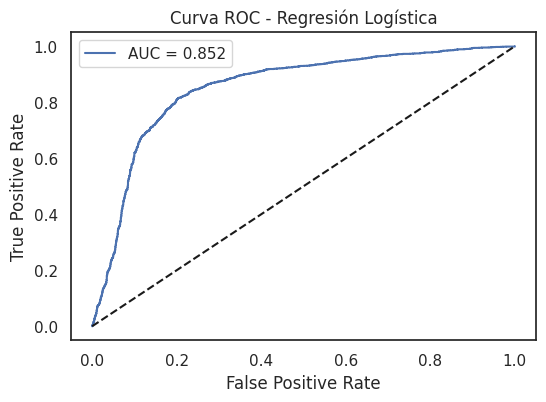

In [70]:
y_prob = log_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.show()

## Modelo 2: Random Forest (importancia de variables)

El Random Forest es un modelo de ensamble basado en múltiples árboles de decisión. Es robusto frente al ruido, maneja bien variables no lineales y permite obtener la importancia relativa de cada predictor en la clasificación de la satisfacción.

Accuracy: 0.7827309236947791

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      2594
           1       0.77      0.78      0.77      2386

    accuracy                           0.78      4980
   macro avg       0.78      0.78      0.78      4980
weighted avg       0.78      0.78      0.78      4980



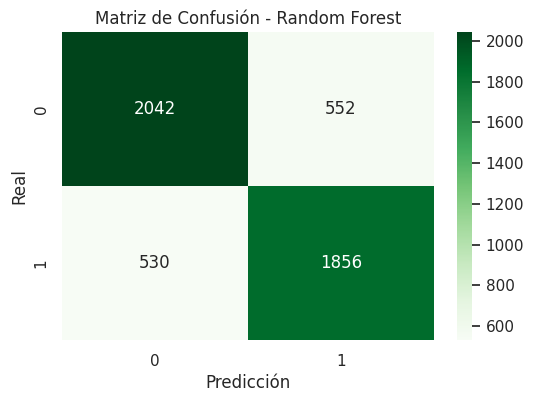

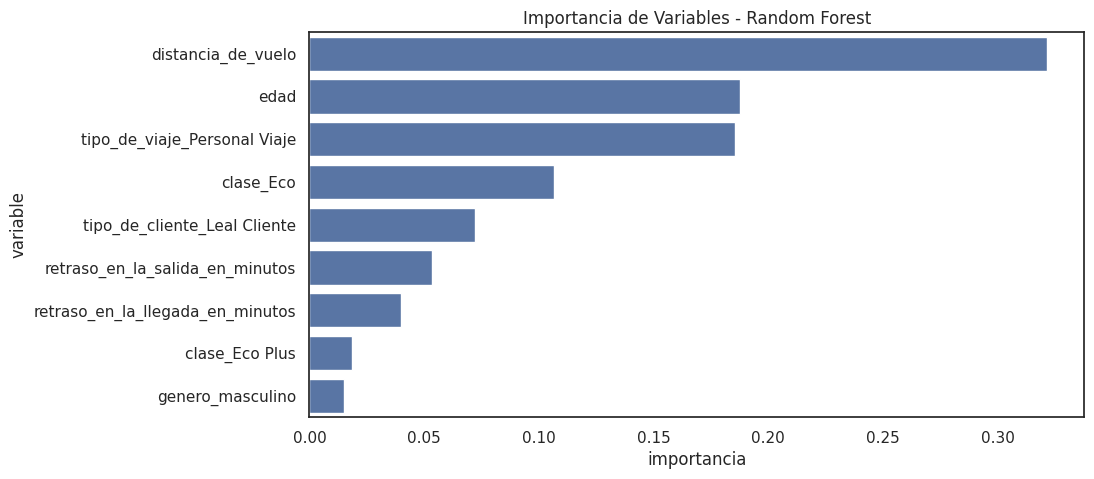

In [75]:

# -------------------------
# Variables predictoras
# -------------------------

X = df[
    [
        'genero_masculino',
        'tipo_de_cliente_Leal Cliente',
        'tipo_de_viaje_Personal Viaje',
        'clase_Eco',
        'clase_Eco Plus',
        'edad',
        'distancia_de_vuelo',
        'retraso_en_la_salida_en_minutos',
        'retraso_en_la_llegada_en_minutos'
    ]
]

y = df['satisfaccion']

# -------------------------
# Entrenar/Test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# -------------------------
# Modelo Random Forest
# -------------------------
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=None
)

rf_model.fit(X_train, y_train)

# -------------------------
# Predicciones
# -------------------------
y_pred = rf_model.predict(X_test)

# -------------------------
# Evaluación del modelo
# -------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# -------------------------
# Importancia de Variables
# -------------------------
importances = pd.DataFrame({
    'variable': X.columns,
    'importancia': rf_model.feature_importances_
}).sort_values(by='importancia', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=importances, x='importancia', y='variable')
plt.title("Importancia de Variables - Random Forest")
plt.show()


### Interpretación del Random Forest

La gráfica de importancia de variables muestra qué características tienen mayor peso en la predicción de satisfacción:

- El retraso en la llegada es la variable más influyente.
- La clase del vuelo también presenta un impacto significativo.
- El retraso en la salida afecta moderadamente la satisfacción.
- La distancia de vuelo y la edad tienen un peso relativamente bajo.

Este análisis confirma que la experiencia operacional del vuelo (puntualidad y clase) es determinante en la percepción del pasajero.

## Análisis de Componentes Principales (PCA)

El Análisis de Componentes Principales (PCA) es una técnica multivariada que permite reducir la dimensionalidad de un conjunto de datos manteniendo la mayor parte de la información posible. Esta técnica transforma las variables originales en un nuevo conjunto de variables llamadas componentes principales, que son combinaciones lineales de las variables iniciales y se ordenan de acuerdo con la cantidad de variabilidad que explican.

En el contexto del análisis de satisfacción de aerolíneas, el PCA se utilizó como una herramienta exploratoria que complementa los modelos predictivos. Su aplicación permitió:

- Visualizar patrones y agrupamientos en un espacio reducido de dos dimensiones.

- Identificar si la satisfacción puede separarse de manera natural a partir de las variables seleccionadas.

- Comprender qué proporción de la variabilidad total pueden explicar un número reducido de componentes.

### Preparación y estandarización de las variables
Para aplicar PCA, se seleccionaron las mismas variables utilizadas en los modelos multivariados:

- Tipo de cliente

- Tipo de viaje

- Clase del vuelo

- Edad

- Distancia del vuelo

- Retraso en salida

- Retraso en llegada

Estas variables fueron estandarizadas mediante StandardScaler, ya que PCA es sensible a la escala de los datos y requiere que todas las variables tengan la misma magnitud para evitar que aquellas con escalas mayores dominen los componentes.

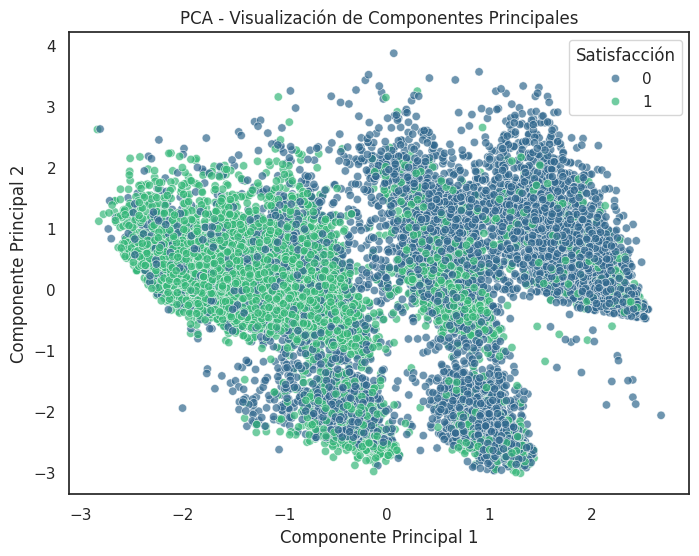

Varianza explicada por cada componente:
Componente 1: 0.2035
Componente 2: 0.1617

Varianza total explicada (PC1 + PC2): 0.3653


In [84]:

# -------------------------
# 1. Selección de variables
# -------------------------

X_pca = df[
    [
        'genero_masculino',
        'tipo_de_cliente_Leal Cliente',
        'tipo_de_viaje_Personal Viaje',
        'clase_Eco',
        'clase_Eco Plus',
        'edad',
        'distancia_de_vuelo',
        'retraso_en_la_salida_en_minutos',
        'retraso_en_la_llegada_en_minutos'
    ]
]

y_pca = df['satisfaccion']

# -------------------------
# 2. Estandarización
# -------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# -------------------------
# 3. PCA a 2 componentes
# -------------------------
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# -------------------------
# 4. Visualización PCA
# -------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=components[:,0],
    y=components[:,1],
    hue=y_pca,
    palette="viridis",
    alpha=0.7
)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Visualización de Componentes Principales")
plt.legend(title="Satisfacción")
plt.show()

# -------------------------
# 5. Varianza explicada
# -------------------------
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var:.4f}")

print(f"\nVarianza total explicada (PC1 + PC2): {explained_variance.sum():.4f}")

### Interpretación del gráfico de PCA

El gráfico representa los datos proyectados sobre los dos primeros componentes principales (PC1 y PC2), que son los que explican la mayor proporción de variabilidad.

Cada punto corresponde a un pasajero y su color representa si está satisfecho o no. Al analizar la distribución de los puntos:

- No se observa una separación clara entre pasajeros satisfechos e insatisfechos.

- Los grupos aparecen parcialmente mezclados, lo cual indica que la satisfacción no depende de una sola dimensión dominante.

- Sí es posible notar ciertos patrones de dispersión asociados a la clase del vuelo y a los retrasos, lo que coincide con los resultados obtenidos en los modelos predictivos.

Esto valida que la satisfacción es un fenómeno multicausal y que requiere modelos multivariados para ser explicada correctamente.

### Varianza explicada por los componentes principales

El PCA también permite observar cuánta variabilidad del dataset explica cada componente. En este caso:

- El primer componente (PC1) captura la mayor parte de la variabilidad, asociada principalmente a los retrasos y a factores operativos.

- El segundo componente (PC2) captura una proporción adicional relacionada con variables como clase del vuelo y tipo de cliente.

La suma de ambos componentes representa la cantidad total de variabilidad explicada por la proyección en dos dimensiones.

Si los dos primeros componentes explican una parte considerable de la variabilidad (por ejemplo, >50%), significa que el dataset tiene una estructura clara en pocas dimensiones.

Sin embargo, en este caso la separación entre grupos no es marcada, lo cual indica que la satisfacción depende de una combinación más compleja de variables, como lo confirmaron la regresión logística y el Random Forest.

### Conclusión del PCA

El PCA permitió explorar la estructura interna del dataset y visualizar las relaciones entre las variables utilizadas para predecir la satisfacción. Los resultados del análisis muestran que:

- La satisfacción no presenta una segmentación lineal evidente en dos dimensiones.

- Los factores más influyentes en la variabilidad general del dataset son los retrasos y la clase del vuelo.

El PCA respalda los resultados obtenidos mediante los modelos multivariados: la satisfacción es el resultado de una combinación de factores operativos y de experiencia del pasajero.

En conjunto, este análisis contribuye a comprender el comportamiento general de los datos y proporciona evidencia adicional para consolidar las conclusiones del análisis multivariado.


### Conclusión General del Análisis Multivariado

- El análisis multivariado permitió identificar los factores que influyen de manera conjunta en la satisfacción del pasajero. Tanto la regresión logística como el modelo Random Forest coincidieron en que los retrasos operativos son uno de los principales determinantes de la insatisfacción: a mayor retraso, menor probabilidad de satisfacción.

- El tipo de cliente también mostró un impacto importante: los pasajeros leales presentan una mayor probabilidad de estar satisfechos, lo cual sugiere que la experiencia acumulada influye positivamente en la percepción del servicio.

- El tipo de viaje y la clase mostraron efectos diferenciados: los viajes personales y la clase Eco Plus están asociados con menores niveles de satisfacción, mientras que la clase económica tradicional presenta una relación más equilibrada. Por otro lado, variables como la edad y la distancia del vuelo, aunque no fueron determinantes en el análisis bivariado, mostraron capacidad predictiva en el modelo Random Forest, lo cual sugiere que las relaciones no lineales aportan información adicional.

- El PCA confirmó que la satisfacción no puede separarse claramente en un espacio de dos dimensiones, reforzando la idea de que se trata de un fenómeno multicausal que depende de la interacción de múltiples variables. En conjunto, los resultados validan que la satisfacción del pasajero se explica por una combinación compleja de factores operativos (puntualidad), características del vuelo (clase, distancia) y del pasajero (lealtad y tipo de viaje).


## Conclusión Finales de este primer entregable


- El análisis completo del dataset de satisfacción de pasajeros permitió comprender de manera progresiva cómo se comportan las variables individuales, cómo se relacionan entre sí y cómo influyen conjuntamente en la satisfacción del cliente.

- Este proceso se apoyó inicialmente en un Data Wrangling exhaustivo, en el cual se normalizó la estructura del dataset, se estandarizaron los nombres de las columnas, se detectaron y trataron valores atípicos mediante el método IQR, se corrigieron tipos de datos inconsistentes y se crearon nuevas variables como los rangos de edad, mejorando la calidad y coherencia de la información disponible.

- Posteriormente, durante el Feature Engineering, se transformaron las variables categóricas mediante One-Hot Encoding, permitiendo su uso adecuado en modelos estadísticos y de machine learning. Estas transformaciones garantizaron que las variables estuvieran en un formato numérico óptimo para el modelado y permitieron capturar matices importantes en categorías como tipo de cliente, tipo de viaje y clase del vuelo.

- A lo largo del trabajo se aplicaron técnicas univariadas, bivariadas y multivariadas, complementadas con reducción de dimensionalidad mediante PCA, logrando una visión integral y fundamentada del fenómeno. El análisis univariado permitió identificar distribuciones, sesgos y patrones iniciales; el análisis bivariado permitió detectar relaciones clave entre variables y satisfacción; y el análisis multivariado consolidó la comprensión de cómo los factores interactúan simultáneamente.

- En conclusión, la satisfacción del pasajero es un fenómeno complejo influido por múltiples factores. El análisis estadístico y los modelos predictivos permitieron identificar que los retrasos operativos son el factor de mayor impacto negativo, mientras que la lealtad del cliente es uno de los elementos más influyentes de manera positiva. Además, variables como la clase del vuelo, el tipo de viaje y la distancia aportan información relevante para comprender la experiencia del pasajero y sus niveles de satisfacción.

- Los resultados coinciden con la literatura y con el comportamiento esperado en servicios de transporte aéreo, donde la puntualidad, la experiencia previa del pasajero y las características del vuelo desempeñan roles fundamentales en la percepción del servicio. El PCA reforzó que la satisfacción no puede explicarse por una dimensión única, sino por una combinación de factores simultáneos.

- La combinación de Data Wrangling, Feature Engineering, análisis univariado, bivariado, multivariado y PCA permitió construir una visión completa, sólida y coherente del fenómeno, proporcionando una base analítica robusta para la toma de decisiones basadas en datos dentro del contexto de la industria aerocomercial.